<a href="https://colab.research.google.com/github/pedrogasg/models-katas/blob/master/SimpleAutoreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import base64
from io import BytesIO
from PIL import Image

In [2]:
image_data = b'/9j/4AAQSkZJRgABAQEAYABgAAD/4QBmRXhpZgAATU0AKgAAAAgABgESAAMAAAABAAEAAAMBAAUAAAABAAAAVgMDAAEAAAABAAAAAFEQAAEAAAABAQAAAFERAAQAAAABAAAOxFESAAQAAAABAAAOxAAAAAAAAYagAACxj//bAEMAAgEBAgEBAgICAgICAgIDBQMDAwMDBgQEAwUHBgcHBwYHBwgJCwkICAoIBwcKDQoKCwwMDAwHCQ4PDQwOCwwMDP/bAEMBAgICAwMDBgMDBgwIBwgMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDP/AABEIAoICggMBIgACEQEDEQH/xAAfAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgv/xAC1EAACAQMDAgQDBQUEBAAAAX0BAgMABBEFEiExQQYTUWEHInEUMoGRoQgjQrHBFVLR8CQzYnKCCQoWFxgZGiUmJygpKjQ1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4eLj5OXm5+jp6vHy8/T19vf4+fr/xAAfAQADAQEBAQEBAQEBAAAAAAAAAQIDBAUGBwgJCgv/xAC1EQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2gAMAwEAAhEDEQA/AP3cooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooo7/wCHb/8AX+NABRXif7VP/BR74E/sR2UknxS+Kng/wjdRxeeNOuL0TapMh43x2cW64kXPHyRtjvivzc/ak/4PLvgv8O5Liz+FPw/8YfEq8jk2Le6jKmg6bKMffQsstw3+68EZ9+9AH7H02aeO3jaSR1RIwWZmYBVA7k8f/Wr+WX9o3/g7X/aw+NMkkPhW+8G/CuxMj+Wug6Ml1dPGeiyTXpnBYD+KNIjnkY6V8G/Hv9tL4vftTSN/wsf4nePPHEPnGdLfW9duby3gcnOY4ncxx+wRQAOAAOKAP7CPjh/wVn/Zn/Zx+2R+MPjl8NdNvNPJFxYQa3DfahEeuDa25knz7eXk+lfJPxj/AODuT9kP4Zuq6Hf/ABC+ITMcbtC8OG3jX/eN89sce4B+lfyvk5NG7mgD+gb4of8AB7TodlqMkPgr9n3VtStcfurrW/FMdjJn3gitphj/ALa/lXz34/8A+Dzv9ojV9Ql/4Rz4d/B/Q7Jx8iXdpqF/cR/9tBdRof8Av3X4+5ooA/Rz4gf8HV37aHjS58zTvH3hzwnHuJ8rSvCthIuD2zdRztx9fWvPfEn/AAcYftqeKYpI7r4769EJAAfsek6bZn8DDbIR+FfEuaKAPprxJ/wWa/aw8WXRmuv2ifi/C2Mf6F4mubJf++YXRfxxWC//AAVY/aiZyf8AhpH49cnPHxA1bH/o+vA6M0Ae/wAH/BV39qOCTcv7SHx4z/tePtVYfkZ8V1Phb/gt3+1x4Ph2Wn7QnxQlXdnN7rMl8c/Wfefwr5XozQB90aN/wcofttaCm2H456jIMD/j58PaPc/rJaMf1r0z4cf8Ha37YfgiFV1TXPAfjFlHLax4ZiiLf+AbW4/KvzLzRmgD9oPhf/wepfGbR7r/AIrT4QfDPxBDn7ujXN9pD4/3pZLkf+O19D/CL/g9d+G+stt8efA/xv4cAON+hazbazn3xMlrj6c1/OxmjNAH9ZHwc/4OoP2Nfiva239oePNe8C3l0dq2viHw5dq0bH+/LbJPAo9SZMCvr74Hft0/Bb9pmbyfh78WPh34zuggla00fxBa3d1Ev+1Eshdf+BAfQV/DznNKGIPU0Af3tk7Rzj8f8/40V/FT+zp/wVe/aS/ZRNmvgP41fELRbHT4/Kt9Nl1R7/TIk9BZ3HmW/GAPucCvvb9mX/g8f/aC+GP2O0+JXg/wL8UNPt0xNcxxvoWqXTdiZYg9uPotqPwoA/pgor8s/wBlz/g7n/Zf+Not7TxwnjD4S6oyL5jarp51HT2kbA2JPaCRyAT96SGMAcnFfor8Dv2lfh3+014XbWvh3458J+ONJjYJJdaHq0F/HCxGdkhic7G/2WwR0oA7eig8UUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRR9788cd68D/bc/4Kd/A7/gnh4Z/tD4rePtG0K9kh8600WKT7Xq+ojJ2+TaR5lZSRt8wgRqfvMtAHvlcT8ef2k/h/8Ast+B5fE3xG8Z+G/BOgxHb9s1i/itI5HAJ8uPew8xyAcImXY8Adq/AH9vz/g8V+IfxNa80P8AZ88K2/w50ZsoniHXo4tQ1yVeMNHB81rbnqCG+0cHIZTxX5D/ABx/aA8c/tKeP7jxR8QvF3iLxp4huBse/wBZv5bycJuJEamQnZGCThFwq5wABQB/Q7+2p/weN/B/4VG60v4K+D9c+KeqJlE1fUd2i6MpK5Dorqbmba2AUaKHPOHxX5Lfth/8HFX7WH7ZIurTUPiRdeBvD9wf+QN4LU6NAowQVM6MbqRWHVZJ2Q/3a+G80ZoAkurqW7upJZpJJppHLu7tuZ2JyST3JPOajzRRQAZ4ooooAM0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABml3kdzSUUAGa3vhz8TfEnwf8XWfiHwl4g1zwvr1gS1tqWkX0tleWxPBKSxsrqe3BHFYNGcUAfpz+xn/AMHW/wC09+zI9npvjG/0f4yeGrcJG0HiOHydUjiXIIjvocOXPGXuFnP86/W/9iL/AIOsP2Z/2pXstL8ZXupfBfxRdFEMHiQCTSXkOchNQj+RUGOXuFg64Ffyr5xRnFAH95nhPxZpfjvw3ZaxoepafrWkalEs9pfWNwlxbXUbfdeORCysp6ggkH1FaA6V/Ej+x5/wUY+Nn7BHiE6j8J/iN4h8JrJIZrjT4phcaZesQFLTWcoeCRtoxudCwHQjrX7Sf8E/v+DyTw/4pmsdA/aO8F/8IzdSERt4r8LxyXGn8n709kxaeIAdWheYkniJBQB+5VFcP+z7+0r8P/2rfhzb+LPhv4w8P+NfDt1gLe6VeJOsbYBMcig7opF3DdHIFdc4KjFdxQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUVk+OPHeh/DHwhqPiDxJrGl+H9B0iB7q+1HUruO1tLOJRlpJJXZVRRg8scDvigDWrxv9s7/goB8If+Cfnw7/AOEk+LHjbSfC1rMrGytJHM2oaoylQUtrZMyzEF0yVXCbgWZV5r8kf+CqP/B3hp/hs6h4L/ZdsYtXvlDQzeO9YsyLSE45NjaSANKwJH7y4VUypxFIhDn8Ivjd8d/Gn7SPxJ1Hxh4+8T634u8T6o++61HVLt7id8dFBY/Ki9FRcKgwFAAAoA/V/wD4KT/8HdXxM+Pa6j4Z+AWkyfCrwrOGhOvXvl3HiS8QjBKYLQ2eVJBCGWRcBllU8V+Q/jTxrrPxE8V6hrniDVtT17W9Uma4vdQ1C6e6uryU9XklclnY92YkmsvNFABnFFFFABRRRQAUUUUAFFFFABRTsdKAMHn+VO2lwG0U4jntRilYBtFKaUcf3aB2G0UU5fwoFYbRTsD/ACaTigBKKD0pQuaAEop3SjAAoAbRS49qF60AJRQetFABRRRQAUUUUAGaM0UUAejfs0ftYfEr9jn4i2/i34X+NNe8FeIISqtcaZclFuUBDCOaM5jnjLAExyqyEjlTX7h/8E0/+Dw3Sdd/s7wt+054fGi3OFiHjbw7avLaSYGN93YrmSM8ZL2+8MzYEMajI/n23cUZzQB/dx8JPjF4T+Pfw/0/xV4J8R6J4s8M6ohe01PSbxLy1mwcMBJGWG5SCCucggggEGukNfxM/sL/APBR/wCMX/BOT4ir4k+FPjG+0MzSI+oaVKftGk6wq/wXNsx2SZUlQ4AkQM2x0JzX9En/AASj/wCDoL4R/t0Ppfg/4mLZ/CL4oXWy3ijvLn/iRa3MRj/RrlyPKdmHEM+DlkRJJmJoA/UKijdj6fzFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRnimXVzHZ20k00iRQwoXkdzhUUAkknIwBz+A61+If/BaH/g6y034aS6p8M/2X76w13xAjPa6l49KrcadpxHBTTkYFLl85/fuDCNvyCYMHQA+/f+Cp3/BbH4Of8Eq/CLR+KdQPiT4g31uZtJ8HaVMrX90Dwks7crawFv8AlpJyQH2JKVZa/mV/4KYf8FkfjV/wVN8aNN461w6b4PtbgzaV4Q0pmh0nT8cKzLktcTAZzLKWYFnCbEOwfMvjjx3rfxN8X6l4g8R6xqmva7rFw13f6jqN091dXszHLSSSOSzsT1JJJrJzxQApJU0lFFABRRRQAUUUUAFFOAo/4DTAbRTj/nipbazkvJVjijZm9AM5pNpasqMXJqMVdkFFeheCP2ZfGHjoB7fSZreBuRNcjyUP0LYz+FeteD/+Cfw8vdrusKG4zFZoW4/3mxj8jXh47iTLsJ/Gqq/Zav8AA/UeFvBXjPiC0suwM+R/akuSP3ysfMo61cstDu9VIW2tppm9EUtmvtzwt+yj4J8KRKBpf2+RTxJdyGRvyGF/Su60jw3p/h6Mx6fYWdindYIVjB/ICvk8X4kYWLth6bl5vRH9B8P/AELc+xCU83xtOj3jFOb+/RHwn4e/Z28ZeImXyPD+pLG4GHkhMaH/AIE2BXYaV+wz4zviBN/Z1kG7yzhsf98bq+yOlHWvnsR4jY+X8KEY/ifsGU/Qv4VoJfX8TVrelofkmz5c0r/gnzqJYfbtc0+Md/JR3/mFrftv+CfWlqP32vXUh77Lfb/7Ma+hOlFeVU44zef/AC8t6JH6Bgfot+HmH3wjn/inJ/5HhFt+wJ4ZX/Wanqzf7pVf6GrK/sE+D8c3muf9/o//AIivbqOtcr4uzZ/8v3+H+R71P6PPh5Bf8ium/Xm/zPEX/YI8HkfLea3+M8f/AMRVS4/YB8OOf3OrapH/ALyq/wDLFe80UR4uzdf8v3+BNb6O/h5UVv7Mpr05l+p87Xn/AAT608q32fxBOrdhJa/1D/0rnNV/4J/65Hu+xaxpMijoJfMVj/46R+tfVnaiuynx1m8Ptp+qR87jvoreHuJVlhZQ/wAM5L87nxdqv7E/jbTkZ47S2vFT/nhOpz+BIP6VxmvfBTxX4cDNeaBqkKKfvmBtn59K/QQ80Zr18P4kYyP8anGX4H57nH0LeG6yby/GVaXZO0l89mfmzdafNZtiSN427hhiq5XH8Nfoxr3w/wBD8Uq39o6Tpt4XHLSwKX/76xu/I1574u/Yy8GeJQzW8F1pcnY28mUz7hs/kCK+hwfiNgqjtXhKP4n4xxD9DPifCpzyrE066XR3g/xun958Tng0V9D+NP2BtUsy0mh6naX0Y5Ec4MUp/mv/AI9XkvjP4J+J/AUzLqWj3kManHnCPdEfo44P4GvrsDnuAxf8Cqm+17P7j+euKPCnizh5v+1cDUhFfaUeaP8A4Ero5KipGjZJCGGCD+VNzlT0r1ulz8+tZ2Y2inUAYFOwhtFB60UgCiiigADYozRRQB+mv/BIn/g5e+K3/BPf+y/Bfj46h8VPhFbiO3SxurjOr+H4VG3/AEKdz80arjFvMSmI1VHgBYn+k39jT9uP4X/t/fB+38b/AAr8VWPiTR5MR3USny7zSpiOYLqBsPDIOuHADDDKWQhj/D7mvWP2Of21fiZ+wX8ZbLx58LfFF94Z1y1ASZYzvtdShzlre5hPyTRHqVcHBAZSrKrAA/uEor86/wDgjV/wcPfDf/gp1p9h4P8AEv2H4e/GlYcS6HPPix11lHzzadK5+fgFzbvmVBuwZURpK/RSgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK5H47/Hnwd+zJ8Jta8dePvEGm+FvCfh63a4vtRvZNscQ6AADLO7EqqRqC7uyqoZiFPG/ty/t1/Df/AIJ3/AHUviN8TdaXS9Hs/wBzaWkQEl9rN0QTHaWsWQZJXwfRVVWdmRFZx/KF/wAFaP8Agsf8TP8AgrJ8V/t3iOaTw/4B0e4aTw94QtLgvZ6aMFRNK2F8+5KkgysBjcyoqKStAHv/APwW0/4OOvGv/BRm+1D4ffDVtU8B/BVWaGW38zytU8WDP37xkPyQH+G2UlTnMjOdix/mFuwaQnmigAooooAKKKKACinBeaXp/wDWFFgGUVJtya7H4b/ArxF8VLwJpljJ5K/fuJRtiT6t0/DrWOIxFKhB1K0lFLuz0spybHZpiY4PLqUqtSW0Ypt/gcYBn/8AXXTeBPhLr/xGvVg0nTbm4zjdIExGn+8x4H1r6d+Fv7EugeEBHda5I2sXigbo/u26n27t+OPpXsunaXa6NYx21nbw21vH92OFAiL9AOK/P828QsPS/d4KPO+70X+bP7A8PfoeZxj1HFcTVlh4PXkjaVRrze0fxZ84/Dz9ggbI5vEmpbWyD9ns+uPdyMD8A1e2eC/gv4X8AIn9m6TaxzIBieRRJN9dzcj8MV1GcUZr85zLibMMa/3tR27LRH9ocGeCHB/DMU8vwcZVF9ua55fe9vkhSefSkoorwL3P1eNNRVo7BS5H/wCqkooHyhRRRSKCiiigAooooAKKKKACiiigAooooAAaVTz/AI0lFO5PKKaZJGsyMrqrKwwwIyGHoadRTjJp3iZ1KMKkPZ1Emuz1RwHjv9mHwf49hkM2lx2Nw3PnWQELA/T7v1yM+9eHfEb9hLWNGLzeH7qHVLdRnyn/AHc4x7Hg/gcn0r6wor6TLeLsywVlGfNHtLX/AIJ+K8bfR54L4lUp18KqNV/bp+67+aWj+aPzj8Q+EtS8JXr2+pWNzZzIcFJoyjD86z8H071+jPinwTpPjiw+zatYW19DjC+ag3J9G6r+HWvBfip+wnDOkl14XutkhO4Wl23BH+y/8t351+k5Tx9g8Q1DFL2cu/T/AIB/FPiF9EniPJlLFZFP63RWtkrVEv8ADs/l9x8uMMNRW54x8Aat4C1KS01awubOaNsYkTAb6HuPfvWMRha+6p1IVIqcGmn1R/KeMwOIwtWVDEwcJx3Uk016pjKKcaFHFWco2ig9aKACjNFFAFrSNWutB1O2vrK5uLO8s5Unt54JDHLBIpDK6spBVlIBBHQjNfvf/wAEOf8Ag6WTUP7F+Ev7UWsLFcZSy0b4iXLBUccBItUPQEfd+19CMGbHzzH8BgcUZoA/vZt7iO6hjljdJI5FDoyNlXBwcg5PbkHoaf0r+YP/AIIQ/wDBx54g/YMvtH+Ffxju9R8TfBSQra2N9hrjUfBgJ4aMfemsxn5oOWRfmizt8qT+mbwH4+0T4p+DNL8SeGdW03X9A1q3S80/UbCdZ7W8hcBleORSVZSCDketAGtRR0ooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvn3/gpL/wUm+HP/BMD9ni78eePr7zJpt9voeh28i/b/EF2FyIYVPQDILyHKRryckqrT/8FHv+CingH/gmV+zVqfxE8dXXmMubXRtHglVb3Xr0qdltCG/76d8YjTLEHAB/kU/4KD/8FB/iH/wUp/aM1L4ifELUPOuJibfS9LgdhYaFaZJS2t0Y/Ko6lj8ztlmJJJoA0P8AgpF/wUo+JH/BT39oK68dfEC+2W8O+DQ9Ct5G+weHrUsCIYVPVjgF5CN0jAE4AVV+es4b8aTdiigAooooAKKKKACinKuRT4oWndVVSzMcAAck0PQqMW9EMrc8EfDzV/iHq0dnpNnNdTORyq5VPdj0A9zXqnwO/Y41LxykOoa75mm6Y2HSPGLi4HXgdgR3P4A19UeDPAek/D3SFsdJsobODGCVHzSH1ZurGvh8/wCNsNgr0sP79T8F6n9SeEv0Yc74n5Mwzi+Gwjs9V781/dT2Xm/uPHfg3+xLpvhoRXviSRdSvOotkz5CfU9WP0x+Ir3KwsLfTLWO3toYbe3jGEjjUKqD2A4qY9f6UV+QZnnWLx8+fEzv5dF8j/Rjgfwz4e4SwqwuS4eMO8mrzl5uT1/QKM80UV5Z95yhRRRSKCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAUHAoxtpKKq5LjczfFXg3S/G2lmz1Wxt763YHAlXOz3UjkfUV84/GX9h6fT/OvvCszXUK5ZrSYjzV/wB09G+nB+tfUHSgHFe5k/EWMy6d6Mrx7PY/K/EPwZ4a4yoOOaUUqvSpGymvn19Hc/N3WNFutCvHt7u3ltriI4dJE2spHHINVM8+nGK++/it8CtB+Ltgy39qsd9txHeRLtlQjpn+8Pr+BFfJPxm/Zv1z4RXjySxm80tmxFeQqWQ+m7+63sfwzX7FkPFuEzFKEny1Oz6+nc/zb8WPo88QcGyliqaeIwnSpFaxX99dPXY83J5oqTZlqTFfWH8+jKKD1ooAKKKKAAHFfot/wQx/4L0+LP8Aglz45tfCPimS/wDFHwP1q63X+kA+Zc6DI7fNd2WSO53PDkJJyRtc7j+dNGcUAf3cfB74w+F/2gPhfonjTwXrdh4k8K+JLVb3TdSsZfMhuomyMgkZUggqythlZSrAEEDpK/kr/wCCFX/Bc3xN/wAEq/ilH4f8RPqHiL4KeJrsNrOjqfMl0iVsA39mDwJAAN8YIEygA4ZUZf6svhL8WfDfx1+Gui+MPB+tWHiLwx4itEv9N1Gzk3w3cLAYZe+cggqeVIYEAgigDoqKDxRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXlH7a37Z/gP9gP8AZz1/4nfEbVP7P8P6Gm2OKIB7rU7hh+6tLePI8yaRhgDICgM7MqKzL2vxZ+LHhv4E/DTXPGXi7WLPQfDPhqzk1DU9QumxFawxjLMcck46KoLMSFAJIFfyO/8ABbT/AILB+JP+Csv7STahF9s0X4X+FXktvCOhSvh44ycNeXIBKm5mABOMrGoVAWwzuAeb/wDBTz/gph4+/wCCpf7St94+8aTfYbCDda+HvD8EzPZ+H7LdlYUzjfI2A0spCmR+cKgRE+by2TQT+VFABRRRQAUUUUAFFOX/ADxXZfCH4L6x8YdbW10+3xArAz3LjEcK+5/pyT2rHEYilQpurVlaK3bPSyjJ8ZmmLhgcvpupVm7RildtmH4S8Haj451m30/S7WW7uZ2CqiLn8fbHXJr60+A37I+m/DuOHUNaWHUtYIBCEb4Lf6D+Jh0z0/nXcfCP4LaP8HtEW30+HzLp1xPduuZJj6ey/wCyPxrrP89c1+N8ScaVcW3h8E+Wn1fV/wCSP9KPBT6MOAyBU834lSrYrRqD1hTf/t0l32XQM8evejNBOTRmvz+99Wf19GmkrIKKKKk0CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACo76wh1Szkt7mGG4glXa8ci7kcHsR3H9akoqo1JRalF6owrYenWpulVSlFqzTV0/VHzT8ff2MTD52r+E42ZeXlsM5Ze/7v1/3ev1zgfNt1ZyWU7xzI0ckZ2srDBB9/ev0oryf4//ALLem/Fa0k1DT1hsddXLB1G2O59n9/8Aa/Pg5H6hwzxxKFsNmLutlL/P/M/hbxv+ivSrqpnfB0OWerlR6Pu6fZ/3dux8TsctRWv4r8H3/gvWptP1K1ltrqBirI64z7j1HfNZRXjt1r9YjOM480XdM/z7xGFrYerKhXi4zi7NNWaa3TQ2iiiqOcKKKKADNfpl/wAG+X/BdzUv+CaHxLh+H/xCvr7UPgZ4oux9oGGmk8I3LsM30CDJaEn/AF0K8kfOgLqUk/M2gNigD+8/w34j03xl4d0/WNIvrPU9J1a2jvLG8tZlmt7uGRQ8ckci5V0ZSCGUkMCCDV2v5xf+DYn/AILrn9njxRpf7Ovxc1dv+EB125EXhDWruX5fDl5I3FnKxPy2szt8rE4ilbn93IzR/wBHQ6dvwoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACg/dPI6fl79Pwor8f/8Ag6R/4LOH9lD4TzfAH4b6wsfxJ8dWRPiO9tX/AH3hvSZRt8oH+C5uVyo/iSHc2FMkT0AfCX/BzZ/wW5k/bU+Kt18D/hjrQb4R+C73GrX1nL+58XalE33g4+/aQMMRgfJJIply4ELL+SLHn27UMeaSgAooooAKKKKACinLxXqH7O/7O958YdYFxOHt9FtmHnz4+8f7i+rH9ByewPLjcZSwtF167tFHvcN8M5jn2Y08ryum6lWo7JL832S6sr/AP9nrUfjNq6vta10m3Yfabphxj0X1b+XevtHwV4J034e+HodN0u2W3toRnjG6Ru7Mf4m/l2qx4b8N2PhHRbfTtPt47W0tl2oi9B/iT69TV3ca/B+JOJ62Z1OVe7TWy7+bP9YvBbwLy3gfBKrUSqYyaXPUtt/dh2S77sO9KG4pKK+VP3rla2CiiigoKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBRSHmiinclxOJ+NvwM0r4z6H5V0q2+oQqfs92o+ZD1AbuV9vxHcH4p+I3w11T4YeIptN1S3aGaM5RsZSVezA9CP89sV+hma5X4ufB/S/jB4Zaxv0CzRgtbXCgeZbv7eoPcHg47HBH3PCvF1TASWHxDvSf3x/4Hkfyv4+fR7wnFtCWb5NFU8fFX7Kql0f8Ae7P5M/PphhqSuo+J/wAMNS+FnimbTdSh2svzRSAfJMmSAynuDj9COoxXM7cHpX7dRqwq01Vpu8Xsz/LvMctxOAxU8Hi4OFSDalFqzTW42ignmitDhCiiigAzX9LX/BsF/wAFuj+1t8O7T4A/FHWvO+KHhGzP/COajeS/vvFWmxJzEzN/rLu3QfMfvSRL5mGaOZz/ADS10Xwp+KPiD4I/EjQvGHhPVrrQvE3hm+i1HTL+2YCW1uI2DI4yCDgjkMCpGQQQcEA/u6or5L/4I2f8FSvD/wDwVX/ZC03xjatY2HjbRNmm+MNFhbH9m34XPmIpJcW84BkiY7uN6bi0b4+tKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKZc3UdlbSTTSRwwwqWkkkIVIwBkkk8AAc5PHBzQB88f8ABU7/AIKI+Gv+CYf7HPiL4na6sd7qUK/YPDukltra1qkit5EHXiMbWkkYcrFHIQCwVT/Gz8dPjf4o/aS+MPiTx5401a51zxV4svpNR1K9nPzTSuc4A6KijCqi4VFVVUBVAH2V/wAHBX/BVuT/AIKfftn3LeH7yST4VfD1ptH8JR7Sq3wLD7RqBBOd1w6LtBwRDHCCA2/PwS3WgAooooAKKKKACinBd1dV8I/hXf8Axa8YW+l2MZ2sd00pHywpkZY/554Hesq9anRpupUdkldnoZXleKzHF08DgoOdSo1GKW7bNr9n34E3nxl8SKuGg0q1Ia6uSvCj+6vqx7D6noK+3PDPhix8H6Db6dp8C21rarsRB+ufUnqT3NU/AHgXT/ht4Yt9L06IJBbj5m/ilbuze5/lxW192vwTijiSpmdfljpTWy/V/wBaH+tfgT4K4PgjLVUrpTxtVfvJ/wAv9yPZLr3YdKKKK+TP6BCiiigAooooAKKKCadriuFFFGMUWC4UUYoIxRYOYKKKKQwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooC4UUUu33FACUUUUAFFFFABRRRQADrStSUVSlYjlucj8Y/g/p/xg8LvZ3Sxx3UYZrW4x80Te/fae49vXFfDfj/AMCX/wAOfEtxpepQtDcW7Y6ffHZh6g8EV+iVed/tE/Am2+MvhVjGkces2ak2svC7+/lsfQnOPQ+xNfdcH8USwVRYXEP929v7r/yP5Q+kb4D0uKMHLPMngljaau0tPaxXR/3l0fXY+Ez1oq9rWiXHh7VZ7K8haC4tnKSIy4KkcEVVIx+dft8ZKS5k9D/LqtRnSm6VRWknZp7prdMjooPWimZBRmiigD6u/wCCO/8AwU417/glh+2Rovjuza8vfCGp7dL8X6PCQ39p6czAuUUkDz4T+9iOV+ZShYJI4P8AYj8MviVoXxi+Heh+LPDGpWuteHfEdhDqemX1q26K6t5UEkci+zKRwfUggEYr+EDNfu9/waMf8FZjo+rTfss+OdS/0O8afVfAFzOxxDN80t3puc4w/wA9xGOBuWcbiXjUAH7/AHT/AOtRR0ooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvyR/4OvP+Cpbfss/swQfAvwjqKw+PPi7ZyDVniceZpegEmOUnn5WunDwDIIMaXPQhSf1C+O3xr8O/s3fBfxR4+8XXy6b4Z8H6ZPq2o3GMskMKFyFXqztjaqDliVAySK/iz/b3/bK8Sft/ftbeNvix4oaRb7xVftLbWZk3ppdmgCW1ohAAKxQqibsAsVLn5mNAHjZ60UHg0UAFFFFABRTh1p6pv28delGw0r6Fzw34fuvFGs2un2cLT3V1IscaKMliTivuf4C/Bmz+Dfg2O1UJJqFyA95OP4mxyo/2R29etef/ALG3wHHhTRx4n1SH/T7xD9jRh/qYz/Fj1YHj2+or3knBr8b444keIqPAYd+5Hd9329Ef6U/RZ8F45Pg48VZvT/2msv3cWvgg+vlKX3pBnB96Siivzc/tDl7BRRRQUFFFFABRQabd3kOn2sk08kcMMSl3d22qijuSeB9enr6VUYOTsjGtXhSg6lR2itW3oku9x1HavCviz+25pfhhpLPw9CuqXSnH2iTK24+nRm+vH4ivAvG/7R3i7x5MxutYuoYW/wCWED+XF/3yMA/jX22V8CY/FR9pW/dx89/uP5h48+lbwlkNWWFwF8XVjo+TSCf+J6P5XPuLVPF2k6HJtvNU06zYdprlIz+RNUU+K3heRtq+JNBY+n2+L/4qvz1utVuLx2Ms0km487jmoA5B619PT8NaFvfrO/oj8LxH03M15/8AZ8tp8vnOV/wP0m0vXbLW491neWt4g6tBKsg/8dyKsmvzd0/xDfaVIHt7ueFx0KNgivSfh/8Atc+MPBbJHJeNq1sMZjvcyZHoGzuH4GvOxvhvWhG+GqqXk1Z/efacL/TTyyvVVLPcDKkn9qD5kvk7P7j7ZorzH4QftVeHfiiY7WVjpWpv8vkzsNkjf7Dd/ocEnjmvUNvFfn+Oy7EYOo6WJi4v8/Rn9dcKca5NxJg1jsmrxqwfZ6rya3T9RtFFFcJ9UFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFHWinYnmQUUy7u4rC2kmnkjhhjUu7u21UA7kmvDvi5+2zpfhUy2fh6FdUu14+0SZFuD7Dhm+vH4ivTy3JsXj6ns8NC/n0Xqz4bjbxJ4f4Tw31nO8QqfaO85ekVq/yPdRjHvWdqni/R9EfZe6pptm3pNcpGf1NfDvjj9o3xd48kb7Xq91FCf+WNu3lRf98rwa4u81K4vjummkkPqxzX3+F8NZtXxNa3kl/mfyPxB9NrDwqOGS5e5x6OpK1/O0btfefoQnxV8Lu21fEegs3p/aEWf/Qq1NL16x1tN1leWl4v96CVZB+a5FfmyGINXbDxFfaW4a2u54GXoUfaRXXU8NaNv3dZ380v0PnsD9NzMfaL67lsOX+7OSf43R+kZor4l+H/AO114w8FNGkt8dWtgRmO9Jk49A33h+Br6L+EH7Vnh34ovHaSt/ZOqPwIZ2/dyt/sN3+hwSeOa+PzbgvMMEnUtzw7x/Vbn9GeHv0mOEeKKkcJKbw1eWijUsk32Utn+B6fRR1NLjFfJ8ttGf0KqiauthKKD1oqSwooooAOtLnke1JnFFVcnlPC/wBr79n5fGWkSeJNKh26lZp/pUaj/XxAfe/3gOvqPpz8jspjZlYbSvBFfpZ975TyvTFfH/7XvwGHgDxCdc02HbpOpNlkUcW8pySvoFPJH0I7V+s8C8SOaWXYl6/Zb/L/ACP89fpWeCqoSlxlk1P3JP8AfRS2fSol2e0vPU8PPWipCMfjSMuPxr9RP4PGUUHrRQAVteAPHOsfDDxxoviXw9qNxpGveHr6DU9NvrZts1ncwuskUqHsyuqsD6isWjNAH9of/BI3/gohpH/BTv8AYg8LfEqz+z22v7TpPifToeBpurQqvnRgEnCOGSaPknypo8ndkD6ZByK/lF/4Nlv+CmjfsF/t3WfhXxFqH2X4cfGJ4dB1UzPth0+/3EWN4eOAJJDC5JCrHcM7Z8tRX9XROT/jQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUVyPx/wDjdoP7NXwQ8WfEDxVcNZ+HfBmk3OsahIoy/kwxl2VB/E7Y2qOpYgdxQB+Kn/B4h/wUl/sjQPDn7Mfhe+/0jVBD4l8ZmGQHbCrE2Vk+D1aRftLKwBAitmBIev5/S3X0r0n9rv8AaZ8Qftl/tN+OPil4pkZta8b6vNqU0fmGRLNGOIrdC3PlwxKkSA8hY1HavNT1oAKKKKACiiigBwPHavWf2U/gp/wtPxqt1eRH+x9LxJOe0rZ+VPx7+wPfFeaeGdBuvE+uWun2cTTXV3IsUaKMlmY4FffXwf8AhvbfCvwJZ6VAEaRFD3Mi9JZTjJ+nYe1fH8ZZ8svwns6T/eT0Xkur/wAj+kPo2+E74u4gWLxkL4TDNSn2lL7Mfnu/I6ZEWGNUVRGqjaFA4UelHRaKM1+CuV9Wf60U6ahFRhokrJBRRRUmgUUUUAFFA5oZlUM2cfXtxVKLexnUqRguaWxR8TeJ7HwfoNxqOoXC29rbLudm7+w9ST6e3Xt8afH39pnVPi3fSWts0llosLHyoEbBl/2pMdT7dAPxJv8A7V3x6k+JPiltK0+ZhoumuUXHAuHHBkP8h7e5OfHSMZNftnB/CtPC044vFRvUktE/s/8ABP8AMH6RXj7iuIMdUyDI6jjg6bak07Oq1vr/ACLouu7GhuaM5FNJ5or74/kUD1ooooAcoxS5yP8A69MzRQMmgna3lV0ZlZeQQehr6K/Zq/a3lsJ7fQfE0zSWjYjt7xuWg9Ax7r+o+lfN+acrsjZBIPrXm5rlOHx9B0a69H1Xmj7fgHxCzjhHM4ZllNRxaa5o/Zmuqkut/wAD9LkdZUVlZWVhkMDkGg18+fsY/HxvEFmvhXVJme6t0LWUjHl0A/1ZPsBkewI9BX0ITur+e84yirl+Klhqvyfddz/YXw18QcBxjkVLOcDpzaTjfWE1vF/p3QlFB4NFeSffhRRRQAUUUUAFFFFABRRRQAUUUUAGeKo+JvE1j4P0K41HUJ1t7W2Te7N/IepJ9Par5IUfNx0718a/tX/HuT4k+KJNJ0+ZhoumvtXHAuHHBkP8h6D3Jz9Hw3kM80xPs9oLWT8u3zPxfxq8WMLwNkjxjtLEVLxpQ7y/mf8Adj1+4ofH39pnU/i1fva2rSWOixMRHArYMv8AtSep9ugH4k+Vl+f60wk5NIWJr9/weCoYWiqFCNoo/wAjOJuKcz4gzCeZ5tVdSrN3bb0Xkl0S6JD26f4UjGm5oJzXUfP3A9aKKKBEmQwp0ErW8qyKxVlOQQeRUIOKXcaLdCoycWmj6O/Zo/a2k06eDQfE1w81o2I7e9c5eD0DHuvv1H0r6hRxLGrqVZW5BU5Br800yp4r6o/Yx+Pba7bL4V1SYtc26brKRz95QOYyfUDke2R6Cvy3jThWHI8fg1ZrWSX5n95fRn8f8R9Yp8J8RVOaMtKNST1T6Qk+qfRvbY+hM5ooNFfkx/oNcKKKKRQUUUUAHaszxp4Os/Hvhe80m+j8y3vIyh9UPZh7ggY9+vFadFa0a0qU1UpuzTujgzHLaGOw1TCYqKlTmnGSezT0aPz0+J/w+u/hl4yvNJvE5t3PluPuyp/Cw9iMGudNfZf7YPwbXx/4LOsWkf8AxNNHQuxA5mhGSw+q9fpu9q+NWUqcNx7elf0Tw3nUcywca321pJeff5n+OHjV4a1+CuJKmX2fsJ+9Sl3g3t6x2ZGTk0UN1or3j8hCiiigCROBn2/Kv66/+DeL/go//wAPE/8AgnloV1rWoC8+Ifw7KeGvFAkk3TXLxRj7Net8xYieDaWc4DTRzgA7a/kQBxX6D/8ABth/wUMb9g7/AIKOaBY6vffZfAfxXMfhXXBJIVgt5pH/ANCu25CjyrhgpdvuRTznvQB/Wr0ooFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfin/AMHjv7ex+HfwF8H/ALPeh3oTU/iBKviHxLGjfMml20uLWJgR0mu0LgjkfYSOjc/tTdXUNlbSTTSRwwwoZJHdgqxqBkknpgdefxr+Lf8A4K0/ttXH/BQX/goH8SPics80mh6pqTWXh+N96iHSrcCC1wjE7C8aCR1HHmSyHqSaAPm8nmkoPWigAooooAKKcBxWz8P/AAhceO/F1hpVrGZJbyVY+n3AepPsOp9qipUjTg5y2WrOrBYOri8RDC0FzTm1FJdW3ZI98/YY+ERkuJvFl7HxDmCyDj+L+J/wBx+Oe1fTI6VneEfDFt4M8NWOl2a7bexjWJf9rA5JHqTkn3JrRzX85cQ5vLMcbKu9tl6LY/2g8H/D2hwfwzQyuC/eW5qj7zktb+my9Aooorwz9SCiiigAooooAAK8v/a2+Jp+Hnwsmht2K3msE2iYPKqR85H4ED/gXtXqP8NfIP7dXixtU+KMOmq+YdMtlTaD8u9vnJ+vIH4V9ZwflscXmcFNe7H3n8v+CfgX0kONKnDvBOIqYeVqta1KL6rm+Jr0VzxBpDKdzfePU+tNpuaM1/QB/kE5N6sCc0UUUEhRRRQAUUUUAFFFFAGp4U8RXHhPxDZ6jas0c1nKsqMOoIORX6DeA/FsPjrwdp+rw4VL6EOVH8LY+ZfwORX505yP619cfsH+Kn1T4c3+mySb20+43oCeQrg8D2BU/i1fn/iFlsauCji18UH+DP7A+h7xpVwHEtTIakv3WJi2k+k46r5tXR7oetFB60V+Jn+ngUUUUAFFFFABRRRQAUUUUAFFFFAHl/7WvxMb4e/CuaG3YreawTaR4PIUj5z+WB/wP2r4jeZpXLE/N6+te4ft1+K21X4n2+mq7eTptsqlQfl3t85P1wVH4V4a3Wv6A4Ly2OFyyEre9P3n+n4H+Q/0l+NKmfcbYilGV6WH/dwXTT4n83+Q09aKKK+sP57CiiigAooooAKKKKAHg4NaPhbxHceE/ENnqVq7Rz2cqyoVPcHNZeaAcVNSMZxcZbPc3w+IqUK0a9FtSi001umndM/RrwB4uh8eeDNP1eEbVvoQ5UfwNj5l/A5Fax4NeF/sGeK31b4eahpkshkbT7gOgLcqjjp9AVP/AH1XuhOa/m/PsB9Tx9Sh0T09N0f7XeE/Fb4k4UwWbyfvTgub/FHSX3tXCiiivFP0cKKKKACiiigAdQ8ZVsbW4IPQ/wCQa+If2p/hF/wq34iTfZ42Gm6kTcWxxwoJ5T/gJ4+mD3r7fB4/SvPP2m/hYvxQ+GF1HHHu1DTQbu1IHzMR95P+BDt3IWvr+Ds6eAxyjN+5PR/oz+d/pIeGceK+FqlXDxvicMnOHdpfFH5rbzR8ItwaKlnheGZkddrKcEHtTOor99P8jZRabTG0UUUEhT1O0559qZRmgD+xz/ghT+3v/wAPEv8Agm54G8YahefbvGGhofDHikk7pG1G0VFMzYAG6eFobjA4BnI/hNfYAOa/md/4NAP24m+CX7b+vfB3Vrxk0D4wacZLBHJKw6vZI80eCTtQSWxuVY4JZ47cc4Ar+mI0AFFFFABRRRQAUUUUAFFFFABRRRQB8E/8HJv7aH/DG/8AwSm8c/Ybr7P4k+JRXwTpOAdwN2kn2pxg5XbZpc4cfdkMfqK/kazg/jX7B/8AB4v+2CPi1+3D4T+EOn3Cyab8JtG+1agi5BGpagI5mVucMFtY7NlPUGaQcZNfj3QAUUUUAFFFFAD+i19NfsHfDLC3nii5jwVzaWuR34LsPoCB+Jr5w0LSpde1i1soVLTXcixIoHJLHFfoV8OvCEPgDwVpukxKu2yhCOR/G/Vz+LZr4Pj7NXh8D9Wg/eqfkt/vP6v+iXwCs64nec4mN6WEV/J1H8P3bmxRRRX4ef6mhRRRQAUUUUAFFFFAAOeK+Cf2jdRbUfjZ4lZiW8u/li+gVto/lX3sDg18B/tAQtb/ABq8UAjG7Up259C5I/nX6V4apfWqz/ur8z+JfptSqLIcuitnVlf/AMB0/U4s9aKCcmiv2I/zdCiiigAooooAKKKKACiiigBw5FfQH/BP7UWHjzWLTd8klh5hHqRIg/qa+f8AOK96/YBtmf4l6tL/AArpp/PzY6+f4sSeUV7/AMp+xeAEqkfELK/Z/wDP1X9LO59aE5NFFFfzmf7NBRRRQAUUUUAFFFFABRRRQAUUUUAfBf7R+otqXxs8SMxLeXfSxc9grYH8q4Uniuz/AGgbdrX41eKAR9/UZm/AuT/WuLPLV/T+WpLCU0v5V+R/hTxpKpLP8bKrv7Wp/wClMQ9aKDxRXafMhRRRQAUUUUAFFFFABRRRQB9A/wDBP3UGHj/WLXc3ltp/mkepEiD+pr6vr5K/YAgY/EzVpP4V0xh+Jljr61zX4Tx8l/a8rfyxP9XvojyqS8PaXP0q1Lel0FFFFfEn9PBRRRQAUUUUAFKeT3/OkozVKVjOUFJWlsfEf7WPww/4Vz8UrloI9thqn+lwYHyruPzL+ByPpivLcc/pX2x+1/8ADj/hOfhVNdQr/pmjN9pUgcmPGHH8j/wE18UMNo9+mK/oThHNfr2XRlJ+9H3X8j/Hv6Q/AK4W4wr0aEbUa37yn2tLdfJ3GHrRQTmivpj8LCiiigDq/gb8Xta/Z++M3hPx54cmS31/wbq9prWnSOpZFuLeVZY9w7ruQZHcZHev7f8A9nf446L+0z8BfBvxE8OvI2h+N9EtNbshIR5kUVxEsio+Ojru2sOoYMDX8Kuc1/Th/wAGfv7YX/C6v+Ce+u/C2/uBJrHwc1lo7ZNp3f2ZqDSXMBLE/MwuFvVwOipGO4oA/Wyig9aKACiiigAooooAKKKKACquv67Z+FtBvdU1C4jtNP02B7m5uJW2xwxopZ3Y9lVQST7Var4d/wCDjP8Aac/4Zc/4JC/Fe8guobfVvGlpH4O09XOGmbUG8m4Vf9sWf2qQemygD+Vf9tT9pLUP2wf2tPiN8TtS+0LP421+71WOKaTzGtIJJWMFvn0ih8uMegjAry0nJoJooAKKKKACinKKPvfnQB7Z+xH8PR4o+JZ1SaMNa6LH5wZhx5p4T8Ryf+A19iHn1/wryf8AY48Bf8IZ8ILe4kGLjWJDdN6hPuqPw5P/AAKvV/u1+AcZZk8XmU7PSHur5b/if69fRp4LXD/BOHdSNquI/ez7+98KfpG33iUUUV8kf0EFFFFABRRRQAUUUUAL/D+NfF37afhn+wfjRcTKm2PUokuR7kgBj/30Gr7RB4rw39uP4bt4i8DWut28Ie40l9sxA58lj3+jf+h19lwPmEcNmajJ2U/d/wAj+bfpTcJVM74Hq1sPHmnhpKov8K0lb5O/yPkButFOAzR1FfvR/kqNooooAKKKKACiiigAooooAeBgV9TfsBeGRD4d1nVmXmaRbZGx2GWb+a18v2VpJfXUUMa7pJGCqB3NfffwP8Aj4bfDHS9NaNY7gR+bccdZWGWB9xwM+1fDcf5hGjl3sE/em0vktz+qvoj8I1My4x/tRx/d4WLk3/elpH9WdYetFFFfhh/qkFFFFABRRRQAUUUUAFFFFABRRRQB8Y/tqeGP7B+M9xOqbY9ShS4HvkAMf++lNePtzX17+3F8OG8ReBLbWreIPcaS+2UgcmFj3/3W/wDQ6+QjX9EcJY+OKyynLrFWfqj/ABx+kJwlUyDjjGUXG0KsvaQ7NT1/B3Q2ig9aK+kPxEKKKKACiiigAooooAKKcq5b1qa0tXvLqOGNN0kjbVGOpodlqyowlJqMVdvofUH/AAT/APDHlaDrOrsnM0i20bH0HzN/Na+iDxXJ/A3wCPht8MdM01oxHceX51yB3lYZI/AYGfausPWv5y4lxyxmY1Ksdr2XotD/AGi8E+FZ8O8GYHLaqtPk5pL+9P3n+aCiiivAP1gKKKKACiiigAooooAZeWseoWctvMiyQzoY3VhkMCMHIr8/PjF4Hk+H3xE1TTGXC287CM/3kJ+VvxBFfoMDzXzD+3x4E8jVNL8RRLhbhDazYH8S8qT9Qcf8Br9A8PcxdHHPDSek1+KP5B+mBwWsy4YhndKN6mFlr35JaP5J2Z82nrRQ33qK/bD/ADBCiiigAr9MP+DUX9q9v2df+CrOjeGrq48nRfi1pVz4anEk+yGO6UC6tJCvRnMkBgX/AK+mx1r8z66r4HfFzVPgH8aPCPjrQ2RdZ8F61Z65YF/uefbTpPHu9tyDNAH92QGKKw/hh8RNK+MHw08O+LdBuPtmh+KNNttX064X7txb3ESyxMPqjqfxrcoAKKKKACiiigAooooAK/Bn/g9a/aP26b8E/hDZ3kTCSS98Yara4+dNoFpZSZ9Dv1Af8B9q/eav5Mv+Doz4+zfG/wD4LHfEC0FxFcad8P7DT/C1gyH7ix263EyHHdbu6uR+GKAPzwPWig9aKACiiigBwOfyrU8FaBJ4n8Wabp0a7pL24SFR6ljisscDtXsX7E3hMeI/jBHdSRrJDpMDXJz2b7q/jlgfwrhzTFrDYSpXf2U2fW8CcPzzziHB5VTV/a1IxfpfX8Ln2Jo2lw6DpFrY267YbOJYYx6KoAH6CrBOaD1or+ZJ1HKTm93qf7i4XC08PQhh6StGKUV6JWX5BRRRUHUFFFFABRRRQAUUUUAAOKr6xpNvrmlXNndRrNbXUbRyxt0ZWGCM/wBe1WM0A4NXCo4NSjujnxWFp4ilKjWSlGSaaezT0aPgj46fCW6+Enju4sZQzWkjGS1lC4EkZJAP17EdiMVxR5r7/wDjL8IdP+MXhNrC6Cx3MeXtbjHzQtj/ANBPf6euDXxF8Rvhlq3ww8QTafqlq8EkfKvj5ZF7Mp6Ef/qr994V4kp5jQVOo7VYrVd/NH+SXj34K4vgzNZ4vCQcsFVbcJLXkb15Jdmuj6o5k9aKdtyKAMV9YfzwNooooAKKcDuo20WbGNopwXBr0r4Afs7aj8YNcWR0e10e3YG4uWXg/wCyvqx9O1c+MxdLC0nWrO0Ue3w7w3mGe5hTyzK6bqVajskl+L7JdWzrP2M/gc3i3xKviLUI/wDiXaY+YVYf66Ycj8F4P5DvX1xVLw34cs/CWh22m6fAtvaWqbEQdv8A656k9zV3Oa/nviLPJ5ni3WfwrSK8j/YTwa8LcNwPw/DLo2lWn71WXeT6LyWy+8D1ooor58/XAooooAKKKKACiiigAooooAKKKKAK+r6Vb65pdxZ3UYmtrqNopUJ4ZWGCM9s+vrXwf8dfhHdfCLx1cWMwLWkjeZazbeJYiTg/XsR2INffGcGuT+Mnwh0/4xeEn0+6Cx3EeXtp8fNC3T/vk9x7euDX2HCPELy3EctX+HPfy8z+c/pDeDkeNcnVbBJLGULuD/mXWDfnuvM/PxuGpK6X4i/DHVPhh4im0/VLZoZEyVfHySrnhlPQj+vFc6/X/wCtX7xRqQqwU6bunsf5OZhl+JwOInhMZBwqQbUotWaa6NDKKcf85oI4960OIbRQetFABRTwO9IOaB2DPP8AhXu37GnwQfxd4mXxBfxZ03TXDQqw/wBdN/D7ELwT+A71yfwA/Z41D4w60sjK1ro8LD7RcsvH+6vqx9K+1vDXhyz8IaFbabp8C29narsRB2+vue57mvz/AI04mhhaLweGd5y0dui/zP69+jT4G4nPcwp8SZvTccJSalBNfxJLa391bt9XoXs4PHFAoJyaK/FD/TyMUtgooopFBRRRQAUUUUAFFFFABXBftM+DF8a/BrV4du6azj+2Rf7JjySf++dw+td7UdxBHd20kMiq0cgKODzkGu7L8VLD4mnXj9lpnzPGGR0s5yXFZXWV1Wpyj82tPxsfmrKNsjDGOelNroviX4bbwj481fT3Xb9ju5IfqAxGawMYFf01RqKpBTjs1c/w1zDBVMJiqmFq6ShJxfqnYZRQTk0VocYUZoooA/rj/wCDZr9pE/tHf8Eevhr9ovY7zVvALXPg+/x/ywFnJ/osZ91spLP6givvnpX4O/8ABk98fpJvD/xz+FtzeRLHbXGneKtMtf42MiyWt5J9B5ViPbd71+8VABRRRQAUUUUAFFFFADZpkgjZ5GEaRgszMcBQBkn6Cv4Z/wBrP40N+0X+1P8AEn4gbZIv+E48U6nr6ox+aMXV1JOF/AOB+Ff2Wf8ABSr4tz/Aj/gnp8bvGFpcC1v/AA/4H1e6sZT/AA3QtJfI/wDIpQfUiv4kT1oAKKKKACiiigB/Uc19XfsCeGRaeDdW1Vk+a5uBbo3cBBuP/oQ/KvlAH+VfeH7MHh9fDvwT0VAm2S5jNy/HVmYkH/vkLXxHH2K9llns19tpfqf1J9EbIVjuOVi5q8cPTlL0b91fmzvulFGc0V+FH+rAUUUUAFFFFABRRRQAUUUUAFFFFACnpWD8Qfhno/xQ0RrHV7RbhBny5AAJISR1Vux+vHqD1rdozW2HxFSjUVWk2pLqjzM2yfB5nhZ4LH01UpSVnGSumj49+Lf7GOveDXkutFVta09eQIl/0hB7pzn8M++OleN6hpk+lTGK4hkhkXqrjDCv0mBrF8U/DjQfG3/IU0mxvX6eZJGPMHtuGG/Wv0jK/EWrTiqeNhzea0Z/F3Hn0NcBi6ssVwxifYt6+zn70V6Nar53PzpPWivtnW/2MvA+sSsy21/Y7u1vccD/AL7BP61lx/sGeDUk3G61xl9DcJ/8RX09PxAyqSu3JfI/C8R9EPj6FTlpRpSXf2iX4NXPjwc+nStXw54N1TxfeR2+m6fdXk0nCpDGXJ/Kvs7w7+yR4H8PNn+zZr49mupi/wD6DtH6Gu+0Tw1p/hm0+z6dY2ljD3SCJYw31wOfqa87HeI2Giv9lpuT7vRH2fDH0L88xFRTzzFwpQ6qF5y+/RHzl8HP2HZnlhv/ABVIsUYw62ULZdvZj0H0GfTg19JaLotr4d0yKzsbeK1trddiRxrtVR/nueTVijNfmucZ9i8ynzYiWnRLZH9q+HPhHw9wZhvZZRS99r3qktZy+fReS0DNFFFeKfqAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAdKOhozRVJ2I5DC+IXwz0f4n6K1jq9otwuD5cg+WSEkdVbsfbp6g8V8t/Fv8AYy17wa8l1oqnWtPXkCJf9IUe6c5/4Dn3x0r7BoJzX0OS8UY3LXy03zQ/le3y7H414m+BPDfGsXVxsPZ4jpVhZS+fSS9fvPzbv9Mn0yQx3EMkMg4Kuu0iq7V+iXir4daD41X/AImuk2N82PvyRDzPwbhv1rgtd/Yw8D65KWFvf2Oei29xhR/30Cf1r9GwviNgZr/aISi/LU/jPiD6GXFGGqP+ycTTrR6czcH873X4nxMTk0V9iJ+wX4NSTP2rXCPQ3Cf/ABFdB4c/ZH8D+Hjn+zZr70a6mL/+g7RXVU8QcrjG8OZv0sfP4H6H/HlWoo4j2VNd3Uv+CR8Y+GvBuqeL7yO202wur6aTosMZcn8q+gPg5+w7NJcQ3/iuRYYVw62ULZd/95ug+gz6cGvozQ/DWneGLT7PptjaWMPGUgiWMN9cDk+5q9nivkM28QsTXi6eEjyLvu/+Af0Z4d/Q/wAkymrDGcQ1frVSOvIly07+fWXzsirouiWfhzTIrKxtobW1gXakUS7VUf57nk1bpM0V+fzqSnJym7tn9fYXB0cNSjQw8VGEVZJKySXRIDxRRRWZ1BRRRQAUUUUAFFFFABRRRQAUdDRRmmI+N/24fDX9i/GH7UqhY9Tt0n4HcfIf1XP414zkmvqj/goB4fWXw5ouqBfmhla2dsdjhlH6NXyuf51/RPCeL9vlVKb3St9x/jZ9ILh9ZRx7mGHirRlLnXpNX/O408UUE5NFfRH4uFFFFAH6Xf8ABpp8am+FP/BYXw7oxUGL4i+HdV8OOxbaI9sS6gp+pawVR7vX9Vw4r+KP/glR8V5Pgj/wUr+A/iZbkWkNh450mO7lLbQtrNdRw3AJ9DDJID9a/tczn/69ABRRRQAUUUUAFFFFAH59/wDB0N8Qx4B/4Is/FOFbhra48RXGkaTAVbBkLalbSyJn/ahilBHpntX8k9f0v/8AB514vGlf8E5Ph7o6zNHNq3xEtpygOPNih06/3DHcBpIj9QK/mgPWgAooooAKKKKALWlWZv8AUYIVHMjBfzr9F/Cuk/2B4W02xH/LnaxQf98oF/pXwJ8H9M/tv4oeH7TtcX0SH2BYA1+hROTX5T4lYjWjR9X+h/oB9CPKko5lmbWt4U/zkFFFFflJ/fgUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUU7k8oZozRRQUFB60UUXJS6sKKKKRQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAdqM0UUwAGg80UUXJ5bbBRRRSKCiiigAooooAKKKKACiiigAooooAKKKKACiiigDzD9sHw9/b/AMDb5u9jNHdD8Ds/k1fEBHHrX6E/GbTf7Y+EviK3P8WnyuB6lVLj9RX57OpQtX7V4c4jmwE6X8svzR/mP9M7KVQ4sw2NS/jUV/5I2vyG0UUV+hH8dhRRRQBZ069m029hubeR4Z7d1kidThkZSCCPcEZ4r+7f4Y+N7f4mfDXw94ks2V7PxBpltqUDDoyTRLIp6Dsw7V/B+GxX9pn/AAR58YR+Of8AglT+zvfxyeb5fw90WzZyckvb2ccD5PrviYUAfSFFFFABRRRQAUUUUAfhB/we5eKri38Ofs46Ikn+iXlz4hvpkx1kiXTUjPrwJpPzr8AjX7hf8HsviT7V8dfgLpG3/jx0HVbvdnr51xAuMe3kfjn2r8PT1oAKKKKACiiigD0r9k3SRrHxx0VWH+okMw/4ApYfyr7mIwa+M/2H4fO+NkLf88rWVv8Axwj+tfZnSvxXxGqXzCMe0fzZ/p19DLB+z4QxFf8AnrP/AMlSQUUUV+en9hBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAV9ZsRqmjXVs33biF4T9GBH9a/OPW7f7Hq1xH08uQrj8a/SX/P8AOvzn+IMH2Xxzq0TDHl3UikemCa/VvDOp/Hh6M/gH6buDX/CZiuvvx/JmMxyaKD1or9WP4BCiiigAr+un/g2U8RTeJv8AgiN8FWmna4mtE1izYs2Six6zfqi/hHsAHYAV/ItX9Vn/AAaW+Kx4g/4I7eH7PzY5P7D8TavZbQRmPdMLjB9/3+fowoA/TDOaKKKACiiigAooooA/mm/4PQ9Wkm/4KM/DaxMjmO2+G9tcKm75VMmp6ipIHqfKHPsPSvx8PFfrp/wedf8AKULwH/2S3T//AE7axX5F0AFFFFABRRRQB7h+wVD5vxbvG/556e7f+PKP619gV8i/sBD/AIupqn/YMb/0ZHX11X4Z4gS/4Vn/AIUf6rfRBjbgCLW7rVPzQHg0UUV8Mf1MFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRQaCMUCuFFAGaDxVKLbsiJVYxjzydl5hRWTrHxA0Lw8WF9rOl2jL95JblFYfgTn9K5rUf2mfA+mK2/XreTHaKN3z+IXFd1HKcZV/h0pP5M+VzLj7hzL1fG46lD1nG/3Xud3RXkl7+2v4HtHKrLqU2O8duOfzYVSk/bv8FRn/j311vpbR//AByu+PC+ay2oSPk63jtwBSdp5rS+9v8AJHtFFeLxft2+CpWx5OuL/vWyf/FmtPTv2yvA9+fmu7y195YP/iSaU+Gc1j8VCX3F4fxy4Cru1PNaX/gTX5pHqtFcXpn7RPgrVmVYfENiC3TzcxfqwArptJ8Uabr6/wCg6hY33vbzpJj/AL5Jrz62W4ql/EpyXyZ9jlvGmQZgk8FjKVS/acb/AHXuXqKBz+Zorit0PpIyTV0FFKBuNHQ0WHcSiiikMKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAFIyvv0r89vjXCLf4t+JUH8OpTgf99mv0IJwK/P347jHxm8Tf8AYTn/APQzX6d4ay/2isvJfmfw79Nymv7Hy2fX2k1/5KjkT1ooor9eP85QooooAK/pw/4Mzrxrj/glt40Rulv8T9QjA9v7L0lv/ZjX8x9f00/8GYf/ACi+8ef9lT1D/wBNOkUAfrnRRRQAUUUUAFFFFAH8zv8Awee2bJ/wUw+H1x/DJ8MbKP8AFdV1U/8Aswr8hTX7Y/8AB634YFp+1J8E9a8lVOoeFbyyM2PviC7D7f8AgP2jP/A6/E49aACiiigAooooA90/YIl8v4sX6/8APTTXUf8AfaH+lfXhr42/YZn8n4zqv/Pa0kX68Z/pX2TX4b4hRtml+8Uf6o/Q9rKXAns/5a1T8bBRRRXwp/VYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRil4K/7VBPNYSiud8e/FfQPhraNJq2oQwSY3LADumk9Nq9efU8e9fPnxM/bt1C+Zrfw3ZpYw8g3FwA8x9wPur+v1r6DKuGcfj3ejC0f5nov+CfkfH3jjwnwlFwzHEKVXpTh70/nbRfM+mta8QWPhuyNxqF5bWNuv/LSeQRrn2J6n2ryvx1+2p4R8KyNFZm51ibHBhXbFn/ebn8gfrXyN4p8eax4xvZJ9U1G7vZGPWWQtj86x81+i5d4dYWnaWLm5vstF/mfxjxl9MrPcY5UeHsPHDw25pe/O3/pK/E938X/t3eJdVkkTS7Wx02HJ2sE8yTHuW4/EAV5p4l+NXinxbIxvtc1KZWOdhmIQfRegrk80u419nhMlwOGVqNKK+R/NfEHidxVnc3LMsfVnfpzNL7lZEtzezXL7pJJJDnqxqPd2zTSc0V6iSWiPhZVJSfNJ3YpOTRnJpM0ZxTuSKDSk5NNzRnFIB3arVnrF1pxDW9xNCw6FWxVPNGaUoqWjRtSrVKUuem2n3TszvfCv7R/jHwg6/Z9cvpY1GBHO/moP+AtkV6b4M/b71KzkVNc0m1u416vbkxOfqOR+AAr51zRnFeRjOH8uxStWpL12f4H6Jw34v8Y5FJPLswqRS+y5c0X6qVz7p8CftWeDfHCqv9of2bcMQPKvQI8n2bJX8yK9FtrqO7gWSGSOWJwCskbBlYHoQRmvzVWTb/Our8B/GrxL8ObpZdL1S4jjB5gZt0TfVTwfxr4rMvDinK8sHOz7S2+8/p3gv6Z2PouNDibCqpHrOn7svVxej+Vj9ASMGivnv4X/ALddlqPl2viax+ySthftNqC0f1ZScj6gn/dr3bw74o07xdpy3ml31tfWrD78T7gD6H0Psea/OczyHG4CVsRB279PvP7N4H8WOGOLKSlk+JUp9YP3Zr1i9fuuXqKD1oJzXj2P0bmCiiikUFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAE4Ffnz8b5PN+MPiZv+olOf8Ax81+gx5Ffnb8Trn7Z8Q9bmJyZLyRvzY1+oeGcb16z8l+Z/C/03Ky/szLKXX2k3/5KjBooPWiv1w/zrCiiigAr+mz/gzHiMf/AAS78dMwxv8AijqDL7gaVpA/mD+VfzJ1/Uv/AMGhfhBfDn/BI1bwbl/4SDxnqt+2R12rb23H/fj+dAH6iiijOaKACiiigAooooA/A3/g920bZqH7NeoLGx8yPxJbO/bg6Uyj8dz/AJGvwVr+kb/g9M8Dx6h+w38J/EhX99pPjo6YrY6LdWFzI362i/kK/m5PWgAooooAKKKKAPVP2O9T/s3456UW4Eoki+paNgP1Ir7cPWvz/wDgRqn9k/F/w5OzbY1v4Q59twz+lfoATk1+N+JFG2Mpz7x/Jn+lH0K8d7ThzHYbrCqn/wCBR/4AUUUV+bn9qBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRQaMc1XKTzBRSn/Z/lXlXxy/am0f4VRS2dmYtU1kZHlI2Y4D/tkdx/dH4kV2ZfluIxtVUcPG7/AC9T5bi7jXJ+GcBLMc4rKnTj33k+0Vu35I9D8UeL9N8E6U19q15b2VqnBeRsbj6KOrH2GfwFfN3xh/bhutT8yx8LxtZwHKNdyj984/2R0X68n3FeM/EP4pa18TdXa81a8kuGP3Y8/JGPRV6AVzR4NfsGQ8DYbC2rYv35/gv8z/OTxV+lVneeueA4evhsNtzL+JJeb+yvJfeWtY1y81++kub66muriRizvK5ZmPuTVUHvnvTCcmlLGvvYxSXLHRH8nVq1SrN1KrcpPdt3bfe4jdaKKKZkFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAOHyrRv4puaM0B6kmeK3PBHxH1n4e6nHdaVfT2jr1CN8rezDofoa58HFGaipThUi4VFdPo9TswOPxOCrLE4SbhOLupRbTT9UfW3wa/bY0/wARiGx8TRrYXZG0XUa/uJP94dVP0yOe1e7Wd5DqNtHPBJHNDMMo8bBkceoPevzVUYPv1r0b4M/tH698IbxUima80uRsy2kzZQjuV/ut7j8civznPOAaVW9bLvdl/L0fp2P7O8J/pbY/AShl3F6dalt7VfHH/EvtLz39T7oPWiuR+E/xp0P4v6Us2mT7bqNd01pJ/rYvw7r7jI9cHiuuHJr8kxWEq4eo6NeLjJdGf6EZFxDl+c4KGYZZVjVpTV1KLuv+A/JhRRRXOe0FFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAEd3dLZ2ckrfdhUux9AASa/OPxLN9p1+8lbrJKxr9A/ijqP8AZXw11+4LbTFp85U++xgP1Ir88J5POlZm6tz9a/XfDSi1SrVPNI/zv+m5jk8fluDT2hOX3tL9CM8UUUV+nn8JhRRRQAV/Wz/wa6aMNK/4Ij/CGX5g2oXGt3L54x/xOb2Mf+Oxiv5Jq/sy/wCCHfw/j+GX/BIn9nvTYY1jW48GWWqlVXaC16pvGP4tOST3JJoA+qh0ooNFABRRRQAUUUUAfmz/AMHYXwxh8f8A/BG3xZqkibpPBPiDR9ahP91nulsSf++bxh+dfyknrX9oX/BZz4Tw/Gv/AIJS/tAaDLC1y3/CE6jqdvEF3M89lEbyEAevm26Y96/i9PWgAooooAKKKKANDw1etpuvWdwDgwyq4/A5r9GdKv11bS7e6jwY7mJZVx6MAR/OvzZ346V9+/ALXP8AhIfg34fuNwYraLAxHbZ8n/sor8z8SMPzYelWXRtfef3F9CjOvZZrj8sk/jhGaXnF2f4M7Cig0V+Pn+jQUUUUAFFFFABRRRQAUUUUAFFFFABRRS44p2FcFOKbcXMNlbSTTSLFHGpd3Y4CgDJJPQAep+vSoNY1e10DS5r28njtrW3XfJI5wqgf56d6+Qv2kf2pLr4mTyaVpLSWeiRtgkHD3ZB4Lf7PcD+fb6Lh/h7EZpW5aekFvLt6eZ+OeLvjFlPAuX+1xL58RJfu6Sesn3faK6v7jq/2h/2xGuzNovhWUxw8pNfDhpPUR+g7Z6n27/N9zcvdTNJI7PJI25mY5J+tRMeTSZr92yrKcNl9H2OHXq+r9T/KHj7xFzrjDMZZjnFVyf2Yr4YLtFfrux+ef60vQVHmjPNemfDAetFGc0UCCiiigAop2MAUY3GiwDaKcRg8VJb2cl222ONnb0UUbalRhKTtFXZDRWvaeBtYv8eTpt5L/uRE1o2/wY8WXAzH4b1p17FbNzn9KwliqEdHNfej1aPD+aVVelhqkl5Qk/yRy9FdNdfCDxTZjM3h7V4R/tWrrj8xWXeeFNS09sT2N1Cf9pCKccTRk7Rmn6NEV8jzKir1sPOK84SX5ozaKkaJkcqy7WHYimlcmtjzeVrcbRTtvNBbP50CsNooPWigQUUUUAOXkUpPFMzRmgdzU8L+Kb7wfq0N9p1zLa3UBDK0b7Tx9K+uv2e/2rbL4mpFpmsGKx1vGEcnbFdn27K3t0J6Y6V8Y7jipLe7ktJlkjkZJEOVYHkGvCzzh/DZnS5aqtJbSW6/4B+r+Fvi/nfBGOVfAy5qLfv0m/dkv0l2aP0sor52/Zk/a0Gqi30HxNOqzcR217IcB/RZCf8A0L8/WvomvwfOMlxGXV3Rrr0fRo/1i8OfErJ+M8rjmWVT1054P4oPs1+T2YUUUV5B+hBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHnv7VGuroXwO1hi2GulS3T3LOCR+QNfCY5NfW37fOufY/h3penhlDXV55xHfCLj/2f9K+Sc8dq/dfD/D+zyvnf2m2f5U/S7zlYzjp4aLuqNOEfRv3n+Y08GignJor7c/lkKKKKAHIBmv7oP2XPhXH8Cv2Zvh14Ih/1Pg3wxpuhp/u21rFCP/QK/ix/Yc+EsPx8/bR+Efge5jaa08XeMtI0e4VV3fuZ72KOQ49ArMT7Cv7iCc0AFFFFABRRRQAUUUUAUfE3h+18W+G9Q0q+jWax1O3ktbhCOGjdSrAjvkEj6V/Cj8V/hzqHwd+KXiXwjqyeXqvhXVbrSL1P7s1vM0Ug/BkNf3eV/Hx/wcMfAZP2fP8AgsR8bdNt7WaCx17WE8TWzOp2znUYI7yZlJ6qJ5pl44BQjtQB8VUUHrRQAUUUUAOUYr7A/YQ8StqvwtvLB23SafdkjJ6I4GB/30rfnXx8Oa95/YN8WnTfiJe6WzHy9QtTsXPBdDuH6Bh+NfLcaYR4jKqlt42f3H719GviJZRx/g5zdo1b03299afjY+tqKD1or+fD/YIKKKKACiiigAooooAKKKKACiiigBwPFV9S1O30XTpru7ljt7a3QySSOcKoAzz/APW61M8ixRlmZVVeWJOAB9TXyL+1d+0hJ4+1J9B0eVk0e0bEroSPtbg8n/cHOAfr6Y+g4fyKrmeJ9lDSK+J9l/mz8h8YPFbAcDZNLG4j3q09KcOspd3/AHV1Zl/tL/tHXHxW1dtP095INDtXOxM4NwR/G+P5DoPxJ8fPXvSE/NSbq/oDAYGjg6Cw9CNor+tT/IbizizMuI8zqZtmtRzqzfyS6JLol0QE80UUV2HzQUUUUAFFO6ilyB/Kgegyius+HPwc134paisGlWMki9XmYbYk/wB5jwK+lPhX+xFonhUR3WvSf2teDBMK5W3B/Lc36fjXg5txJgcvVq0ry7LVn6z4e+CnFPGE08toONLrUn7sF8+voj5f8H/DTXPHV2sOl6beXm7GTHGSq+5PQD3NezeCP2CdW1BxJruoWunw94of30g9jj5R+Zr6i0rSbXQrJLaytrezt4/uxQoERfoBxVjNfmuZeIeLqvlwkVBd93/wD+2uC/oc8O4GMauf1pYmpu4r3If5terR5X4R/Y38FeGEVprW41OTA5upeM+wXH5HNd1o3w18P+HAn2HRdLtmTo6Wyb/++sZrazRmvjsVnOOxDvWqyfzP6QyPw04WyiHJl2ApU/NQTf3u7/EFXYuAMD0oziijNefKpKW7PsKOFpUlanFL0SX5AOKbcW8d1GUlRZEbgq67gfwp1FONWcfhbRNbA4equWrCMl5pP8zmdb+DXhPxEP8AS9A0pmOSWSBY3P4rg/rXnvjD9hvwnrpeTT5tQ0uZjkAOJYh+Bwf/AB417RRXqYTPswwzvRqyXzv+Z8HxB4ScIZ1FxzHL6Um+qiov1vG2p8e+Of2I/E3hqOabTWttYt0ycQnbIAP9lsZJ9FJryLW/Dl94ZvXt9QsrmzmjOGjmjKMD9CK/R/PNZXivwFo/jqx+z6tp1rexgEKZEy6f7pHzL+H419plniLXhaGNgpLutH/kfzLxt9DTKsSpV+GcS6M/5J+9H05t1+J+crfeNJX058WP2EtyyXfhW63NncbS5bnHfa/AP0OPqa+efE3g7UPBmpSWep2c9nPGcbZU21+lZXnmDx8ebDTTfbqvkfxNx14W8ScJV/ZZzh3GN9JrWD9JLT77GTRT8Ak5H0ox0+levY/PrDKKDxRSJCiiigCSOQoysp2sOmO3vX05+yj+1D9pW38NeIZ/mGI7K6kb8o3J7eh7dOmMfL+eafFO8EqujMrKcgjsa8vOMooZjh3QrL0fVPufoHhz4jZrwbm8M0yyW2k4vaceqa/J9GfpaaK8K/ZK/aP/AOE1sIfDusy/8TS3TFtM5/4+kH8JP98DP1HuOfde1fz3m+U1svxLw9ZbbPuu5/sF4e8f5bxfk1POMsldSXvR6wl1i/NfitQoooryz7oKKKKACiiigAooooAKKKKACijtRnHXgdz6CqUW3ZGdSrGEeaW2/wBx8kft5+JjqPxKsdOVz5en2a7xnjexLf8AoJWvCa6/47eLm8a/FbWr7czRyXTrESeiA7V/IAVx/b9K/pXI8J9WwFKiuiR/iP4pcQPO+LMfmd7qdWVvROy/BDT1ooor1T8/CiiigD9AP+DYj4MSfGP/AILL/C+RrQXWn+D4tR8R32RnyVhs5Y4X/C5ltuexNf1uCv54/wDgyj+BA1j47fGz4nTRyq3h7QrHwzaOU/dym9na4mAP95RYQ59BIPWv6HKACiiigAooooAKKKKACv52f+D1P9nz/hH/ANo74N/FGATNH4p8P3fhq6Cp+7jksJxPGS3950v2GD2h9jX9E1fmz/wdZ/s0P8ff+CSPiDW7SKabUvhbrNj4piSJNzSQhntLgHuEWK7eU+nke1AH8pJOTRRRQAUUUUAOAxXUfCHxZJ4H+I+j6krMq29yjSY43Jn5h+IyK5XNOErKVO4/L09qzrUlVpypy2asd+V5hUwOMpY2i7SpyjJesWn+h+lkcqzRq6MrKw3KQcgg06uD/Zm8bx+Ofg7pM27dNZxizmz2aMAD/wAd2/Uk13gOK/mPMMLLDYmdCW8W0f7lcI8QUc7ybDZtRd41oRl961/G6CiiiuM+jCiiigAooooAKKKKACl7UlcN+0D8YIfg/wCBJrrcp1C6Bhs4zzl8feI9F4PvkDvmurB4Oriq8aFJXcnY8HibiTBZDllbNswly0qUXJv8kvNvRI82/bH/AGgv7DtJPCujz/6VMuL6aM/6tT/yyB9T1Ptx618ql2ZuWbrnmptY1i41zVLi8upZJri4cySOzZZmPJJNVgxFf0VkeT0stwqw9Lfq+7P8Z/FDxGx/Gee1c2xjaje1OHSEFsvXq31YhOTRRRXsH5yFFFFABRTgvFbHgjwPqPxB16DTdLtZLm6uG2hVHCj+8T2A7k8CpqTjTi5zdkup1YPB18VWjh8NFynJ2UUrtt7JIzrGxk1CeOGGNpZJDhUUZJNfRXwO/Ymku1h1TxYXhj4kSxTh3H+2f4fp1+len/AT9mfSvhFax3dwsd9rjAFp2GVgPpGOoP8AtdfTFendDX5NxHx1ObeHy52XWXX5dvU/0E8F/op4fDxp5vxlHnqaONH7Mf8AH3f93ZdblXRdBs/Demx2Wn2sNnaw/diiUKo9/c+55NWgKBxRX5lOpKcnKTuz+5MLg6OGpKhh4qMI7JKyS7JIKKKKzOoKKKKACiiigAooooAKKKKACjNFFBLiGKwfiB8MtF+JukNaaxZR3C4wkuMSwkjqrdR9Olb1Ga2w+IqUJqpSfLJdUebmmTYLMsNLB5hSjUpyVnGSun958Z/HP9k3VPhi0l/pyvqWi5/1ir+8hH+2P6jI+nSvH2UxsQflOcGv0rkRZkZWVWVhggjgj0r58/aM/Y/h1pbjWvC0KRXfLzWCjCy9yYx2P+z09PSv1rhrjmNVrDZjpLZS6P1/zP8APnxt+itUy+NTOuEIudNXcqO8orq4d1/d3XS58pk5NFWLuyk065eGeNo5IztZWGCD6VCFzX6Ymmro/iCdOUZOMlZrp1G0UEYNFBAUUUUAXNJ1SfRb+G6tpGhmt2EiOhwykc5r7i/Zx+N8Hxk8GK0zqusWQCXcfALcYEgHoe+Oh9OM/CqnjrXU/CL4mXnwp8aWuq2rHEZCzxn7s0f8Sn6j8jg18zxRkEMzwvKtKkdYv9PmfuHgX4tYngnPY1ZtvC1Wo1Y+X8y84/lofoGaKz/Cfiiz8aeG7TVLGTzLW9jEiE9R6ggdGByD+nFaJFfz9WozpzcKis07M/1/wOYUMZhoYvDSUqc0pRa1TT1TEooorI7QooooAKKKKACiiigBVrl/jR4s/wCEI+FutaiG8uSO2ZITnBEjfKpHuCc/hXTivnz9vbxwLTw3pmgxybZbmQ3cqjsq5Vfzy35Cve4dwLxeY06PS936LU/K/GjiuPD3B2OzG9p8jjH/ABT91fnc+WJ5mlmZmzuY5NRk5NIzZNJnFf0ctrH+LMpOT5nuB60UUUEhRRVzQtEu/E2s2em6fbS3l/qE6W1tBEu6SeV2CoijuWYgAe9AH9S3/BpN+z43wb/4JKaf4kmDfbPih4k1HxCA0e144I2TT4091/0J5AT1ExxxX6dV53+yJ8A7b9lf9lf4dfDWzkWeHwL4bsNDMyqF+0PBbpG8xHYuysx92NeiZzQAUUUUAFFFFABRRRQAVynx3+D+k/tCfBDxh4D15ZG0Xxpot5od9s+8ILmB4XK+jBXYg9jiurooA/hF+K/wy1b4K/FLxJ4O8QWwtNd8J6rc6NqUAOfJubeVopUz7OjDPtXOmv0u/wCDq79kD/hmn/gqfrHibT7QW/h/4vabB4nt/Kh2Qpec297GG6NIZYvtDf8AX2K/NE9aACiiigAooooA+i/2CfiB9i17UPDsrYivo/tEH/XReoH1XP5CvqWvzu+HHjCbwL4103U4GKtZzrIcH7wB5B9j0r9CdD1eHxBpFpfWreZBeRLNGfVWGR/PBFfi/iFlbpYyOKitJrX1R/pp9D3jhZhw9V4frSvUwsrxvv7OX6J3RYooor87P7ICiiigAooooAKKKO1OwuYju72LTrOWeaRI4YUMsjscKqjqT7AA18K/tE/Fub4tfEC5ugzCwtT5Fomf+WYPBPueSfrXvf7bHxc/4RfwpH4ds5MXmqLvnweVh6Y/4ER+S+9fIhHFfsXh/kapUv7QqrWXw+nf5n+b/wBLrxSeOzCPCOAn+7o+9Vs959I/9urX1Y1vvUUZor9JP4kCiiigAop33lrS8J+F7zxjr1rpunwtcXV04RFUdz69gPc1M5KEXKWiRth8PVr1Y0KMXKUmkktW29kkXvh58PdR+JniS30zTLdpJpvvN/DGvdiewH+ea+3Pgv8ABHS/g54dWC1RZr6UAXN2R80p64Hoo9O9Q/Af4I2Hwa8LrAqpNqVwoa7uB3P91e4UfrXc8g+/rX4jxbxVLHVHhsM7Ul/5N/wD/Uf6PfgDh+FsJDOs4gp46avZ6qkn0X97u+myF685pvU0UV8K2f1XygetFFFSaBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAdBRniiiq5ieW543+0r+zBb/Eqzm1bR4Ut9cjBZ0UbVvMdf+B+/c9fWvj3UdPm0q9kt7iJoZoWKujKQwI6jHrX6TdvrXhv7WX7NyeNtOl8RaNEq6tbrvuYl/5ekHVgP74/Ue45/TODeLpUpLA4yXuvSLfTyfl+R/Dn0kfo9U8bSqcU8OU7Vo61acVpNdZRX8y3a677nyCetFSzxtBM0bKVZTggjoaYOTX695n+dUotOzG0UHrRQSO6rSrx3x9aYDijNAH0N+xJ8aP7C1xvDF/MBZ6g++1Zj9yfGAv0YcfXHvX1V/nivzY06/l0y8huIWKS27B0YcbSK+9fgR8T4/iv8O7PUfMVruNRBdjuJQBk49G6/iR2r8h8QMj9lUWYUlpLSXr0fzP9F/oh+KUsbhJ8IY+d50lzUr7uHWP/AG69V5HZE5ooor8xP7lCiiigAooooAKKKKADcFGScDufSvhP9pn4g/8ACw/i1qVxGd1vaubaD02JwD+PJ/GvrT9on4iL8NvhTqV4snl3Vwn2W3wfm8xweR9FyfwFfBk87XEzMzZZjuJzX6z4c5XpPHTX91fqf59/TP44U54XhbDy2/eVF+EE/wAWRHrRQetFfqZ/A4UUUUAFfcf/AAbofsqN+1j/AMFb/hbZTWstxovge6bxpqrIR+5j0/EsBYHqrXhtIyO4lr4cr+hn/gy8/ZC/4Rz4Q/FL44alZhbrxNfReEtElkgKyJa2wE926MfvRyzSwIdvR7JhkngAH7hkc0E5oFFABRRRQAUUUUAFFFFABRRRQB+Vf/B3H+xl/wANCf8ABOOz+I2m2gm174L6quosyozSNpl2Ut7tFA9JBazMT91LdzX8u5r+7z4sfDDRfjb8LPEng3xFa/bvD/izS7rR9TgLbRNbTxNFKmeoyrkZHIJBFfxFftcfs263+x7+0146+F/iJG/tfwPrVxpMkpiMa3aRuRHcIp58uWPZIvqrqaAPOKKD1ooAKKKKAHg44FfXv7EHxN/4SXwJNoNxJuvNJbdCM/M0LHH6Mf8Ax4V8grzXafAj4lTfC34j2OpKSbfcIrlf70TcN/PI9wK8HibKVj8BOiviWsfVf5n694H8fS4S4sw+Yzf7qT5Ki/uSdr/J2Z99UVHZ3cWoWcNxDIskNwgeN1+66kZBFS44r+c5RcXyy3P9mKNaFWnGrTd4ySaa6p7MSiiipNgooooAKh1PU4NE0y4vLmQR29rE00jn+FV5J/AA8d6mFeM/trfEf/hE/hvHpMEm261p9jgHlYlxn8zgfga9TKMvljcXDDR6tX9Op8L4jcXUeGOHcVnVZ/w4vlXeT0ivvPmD4wfECb4mfEHUNWmJ2zSkRDP3EHCr+AFcwcU1mwetNJzX9KYejCjTjTgtIqyR/ibmmZV8fjKuNxT5qlSTlJ+bd2DdaKKK0PPCinKMUGgCSKFpnVUXczHAAHJNfYn7I/wFX4eeG01rUolOsajGDECObeJv/Zj39Bj3ryP9jf4Kf8J34q/tq/h36XpLBlUjiaXqq47gYyfwHcV9hH9c1+Wce8ROP/CbQf8Aif6f5n97fRM8HIVf+MzzaGidqEWtPOf6R+8KUnmkozX5RzH+gfKB60UUVJYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAE5o+6aM0ZquYzlTUlZ7Hyp+2N+z8PDOo/8JNpMCrp943+lxIvEMh/iA7Kf0ORxxXz9jr2r9Ite0K18TaLdafeRrNaXkZjlQ9wff8AkexxXwX8avhfcfCXx3d6XN/qQfMt5CP9bEeh/wA9CDX7ZwPxA8XR+p1378NvNf5o/wAwfpS+DseHcy/1iyuFsNiH7yW0Kn6KW687o42ig8Givvj+RQooooAk3cV7P+xb8Uj4N+IX9k3MpWx1oCHB6LL/AAH8fu59GrxbtVnTdQk029huI/lkhYOrDsRXDmeBhi8LPDVNpL8ejPrOCOKcTw5nmGzrCu0qMk/VfaXzVz9JTRXN/CDx3H8SPh1perKwaWaILcAfwyLw/wCvP0IrpD1r+acVh50K0qM94tr7j/brI84w+a5fRzLCu8KsYyT8mrhRRRXOesFFFFABQBk0A4rnPi38QYPhn4A1DVpmTfDGVgVv+Wkp4Vcd+eT7AmujC4aderGjT3k7I8rO85w2VYCtmOMly06UXKT8krnzV+3D8T/+El8cxaFbSK1no64kwchpjy35DA/A14SOas65rE2vavc3lw7STXUhkdicliTkmqmcCv6UynAQwWEhhofZX49T/ErxA4uxHE3EGKzrEPWrNtLtHaK+SsBooor0D40KKKKALOk6Xc65qdvZ2dvNd3l5KkEEESF5JpGYKqqByWJIAA5JNf2x/wDBNj9ke2/YT/YV+GPwphWD7V4T0SKLUpIG3Rz6hLme9kU9w1xJK4z0BAr+aX/g2J/YgP7YX/BUXwtq2o2ck3hb4RoPGOoOVYRvcwuBYRbxwHN0Y5drcMltKOgNf1lA5/8A1UAGc0UUUAFFFFABRRRQAUUUUAFFFFABnBr+eH/g8n/YM/4Qv4weCf2htEslj0/xlEvhfxM8aBVGowRs9nM56s8tqkkeeirYoO4Ff0PV4X/wUq/Ys0v/AIKEfsRfED4T6i1vBceJNNY6Vdyj5dP1GIia0nOBnYs6JvC8shdf4qAP4lz1orW8a+DNU+HXjHVvD+uWFxpeuaDeTafqFncLtms7iF2jlicdmR1ZSOxFZJ60AFFFFADgMc0bv8abnijNAH2F+xX8X/8AhL/Bz6DeSA32krmHJ5kh4H4lTx9COwr277tfnv8ACb4hXfwx8b2Or2rYa3ceYmeJUPDKfYjIr768MeI7XxfoFnqVlIslrexiVDxkZ6g+hFfh/HWR/VMX9ZpL3Kn4Pqf6l/RV8Uf9YMg/sPGT/wBpwqSV95U/svzts/kXqKKK+DP6xCiiigAPAr4t/bP8VN4i+M1zCHZodNjW1QemOW/8eLV9qZytfCP7UGnSaZ8bdfWTP765aVc+jfMP0NfonhzTi8fOct1HT7z+OfpnYyvT4Uw1Cn8E6y5vlFtX+Z52etFB60V+0H+ZIUUUUAPzlfWr/h3QJ/FOuWdhaxtJcXkiwooHJYnArPXkV9C/sJ/DD+1/El14juY98GnjyrcEdZW7/gufxIrzc4zGOBwk8TLotPXofceHPBtfiniLDZLQ/wCXklzPtFayb+R9E/C/wDb/AAz8D2Oj24Q/Z0BlZePNkONzfnwPYCug7+vvRnP880V/NlfETrVHVqayerP9sMnynD5ZgaWX4OKjTpxUYpdkrATk0UUVgeoFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAAfyryX9r74Sr8Qvh5JqFvGv9paMpmUhfmki6uuevGNwHs3rXrVEkSyxlXVWRuCrdGBHT+lejlePngsVDEU94v711R8bx5wlheJcjxOS4tXjVi0vKX2WvNPU/NF12OV9KbXoH7SHw1Pwx+KN9ZquLWZjcWxxwY25A98dD7g1wIXBr+k8LiIYijGtT2krn+JmfZLiMozGtlmLVqlKTi15p/ruNooPWiug8gcBkUqnaaAMik2nPego+pP2AvFbT6NrGju7HyXW6iHpn5W/ktfRRGK+W/+CfunyHxLrd1tPkraLGT2DFwR+imvqSvwPjanGGb1OXqk362P9cPouYzEYjw8wnt3fllOMb/yqWgHg0UUV8ef0UFFHalIp2J5hVGT7nivkf8AbZ+L3/CUeKo/DtlJusdJJMxB+/P3/wC+R8v5+te/ftBfFeH4S/Dy6u96i/ugYLRO5cg/Nj0UHP5DvXwff302pXklxM7PJMxZie5Pev1Dw+yPnm8xqrRaR9er+R/Cv0v/ABSVDDQ4Py+fvztKrbpH7MX6vVrtYrnrRQetFfrZ/neFFFFABTwuR+GfrTK+mP8AgkZ+wZef8FHv2+PAfwzWCd9Aubsal4muIty/ZNJtyHuWLqCY2cbYUY8ebPF60Af0J/8ABq5+wX/wyH/wTesvGmr2f2fxd8bJk8SXJdNsyaYqsmnQnn5lMbPcDgEfbSD0r9Mar6RpNroGkWthY28FnY2cKW9vBCgSKGNFCqiqAAFCgAADAAqxQAUUUUAFFFFABRRRQAUUUUAFFFFABR0oooA/mj/4O5f+CcZ/Z6/az0v46eG9PMXhP4ufudY8mLEVlrkKYYnChV+0wqJQMlnkiumPWvx/PWv7Zv8AgpV+w5of/BRj9i/xt8J9aaC2m8QWZk0i/kTd/ZepRfPa3A74WQDeFwWjaRMgMRX8XfxR+GOufBf4leIPB/ibT5tL8R+GNRn0nU7KXBe1uYXMckZIyDh1YZBIOOCQQaAOdooPWigAooooAerkAdvevon9iX43/wBlai3hXUpv9Huzusndv9XJ/c+jdvce9fOvT/GrFjeyafeRzQs0csRDKynkH1rzc3y2nj8LLD1Ouz7Poz7jw744xvCWfUM6wT1g/eXSUX8UX6r8T9JicmivOf2bPjZF8XvBUfnSKNWsFEd0p6uMYEmPfv759q9G61/OOPwNXCV5YestYs/2f4S4qwPEWU0c4y6XNTqpNeT6p+aejCiiiuM+lF/wr5f/AG7/AIaTRaxZ+JrdS0E6C1ucD7rqPlJ+q8D/AHTX0/ms/wAWeF7Pxr4eutL1CETWt2hRx3HfIPYjAIr3uHs2eXY2OI6bP0Z+VeMPh7DjPhmvlF+Wp8VN9px2+T2fqfm+3WivTvjh+zZrHwj1OSRYZL3SHciG6jQlQOoV/wC62O35ZrzUrg496/oTB4yjiqSrUJKUWf46cRcN5lkeOnl2a0nTqwdmmvxT6p9GiOinbMZ49qsWGlzatdrDbQyTTNwEQZJNdUrJXex49OnOpJQgm29LLe/oJp9hJqV3Fbwo0k0zBVVepJ4r77+B3w+Hwy+GWm6W0YjuBH511jvK33vy4X/gOa8t/Zb/AGV5PCNzD4g8QQ7b9cPbWrjJgPZ2H94dh1B56gCvf81+N8dcRU8VJYLDO8Yu7fd+Xof6TfRV8G8ZkNGfE2cw5K1aPLTi94werbXRy7dhKKD1or83P7SCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACjPFFFBPL3PEP23fhk/inwPb63aQiS60dts2B83kt3/4C3/oR9K+QG4NfpVd20V9aSQTxpJDMpjkVxlWBzkH6g4r5H/aN/ZUvPA+oT6tocEl7o8jF2jQbpLXPOGA/hH978Pr+t8CcSUlSWX4iVmvhv1T6H+ev0rPBnHVMfLi/J6bnCSXtoxV3FrRTstWmt+zPCycmipJIzE5VlwQeRjpSNya/UT+EeV31ETrUiI0rgDnccfWnW8JnZUVS0jHAAFe//s0fsnXWtahb634kge306MCWC1b5ZLk9sjqE7+pHTrmvOzXNKGAoOtXla3Tq/JH2nAfAeb8WZpDLMppOTbXNL7MY9ZSeyS/HoeqfsffDWTwF8K1uLhSt1rD/AGlxjlY8YQEfTJ/4EK9VPWhVVECqAFUYAA4AoJzX86Zlj5YzFTxM95O//AP9meB+E8Pw3keGyTC/DRilfu+r+buFFFFeefWiqMg0y8u4tOtJLieRYoYEMru5wqqBkkn2H6c08f59q+dv20fjwNNtG8J6XMPOmAa/dDnaOoj/AJE/gPWvZyPKauYYqOGp/N9l1PznxP8AEHA8HZDVzfFv3krQj1nN7Jfm/I8g/aT+Mcnxd8eSyxsy6ZZZhtI/9kH7xHq3X9O1ectwaRnO7rTc1/ReDwtLDUY0KStGKsj/ABj4i4gxmd5lWzXHy5qtWTk369PRbID1oooroPFCiiigB6j2r+mn/g0n/wCCbp/Zq/ZC1D42eJNN8jxh8YQh0nzkAlstBjOYsZAZftMmZjglXjS1YYINfht/wR5/4J46h/wU0/br8I/DhFuo/DMT/wBseKryE7TZaTAyGchudryFo4EbB2yToSCoOP7LPDnhzT/B/h2w0jSbK203S9Lto7OztLeMRw2sMahEjRQAFVVAAAGAAKALtFBOaKACiiigAooooAKKKKACiiigAooooAKKKKAA8iv5+f8Ag77/AOCW50DxRp37Ufg/T2+w6w1vonjuKFCfJuQBHZ6g3ZVkULbOTtAZLfAZpGNf0DVyfx0+Cnhr9pH4N+JvAPjDTY9W8L+LtNm0vUrV/wDlpDKpUlSOVdSdyuOVZVYEEA0AfwnnrRXvX/BSf9grxN/wTa/bE8VfCvxMsk66TN9p0fUmhMcetabKSbe6Tt8ygq4BISWOVMkoa8FNABRRRQA5TRn8qbnFGcUDudX8I/ihffCjxja6rZuT5RAmj/hljJ+ZT9R/TvX3h4H8Z2PxA8LWmqafJ5lvdKDjjdG3dSOxB4/WvzmHAr1f9mL9oCb4SeJBa3jPJot8wWdOvkn/AJ6D3Hf1HHpj4njDhtY+h7egv3kfxXb/ACP6f+jf41y4SzL+yc0m/qVdq/8A07lspLyf2vvPteio9PvodVsobi2kjmguEEkciEMrKehHtUh4NfhkoOL5Xuf6qUcRTq01VpPmjJXTWqafUM805jzTSc0UubsbcvUZc20d/byRTRxzRTKUdJFDKwPUEHtXnHjH9knwT4vuDK2ny6fIxJZrKQRbv+AkFR+AFelUZrsweZYnCvmw83H0Z8xxHwTkWf01TznCwrJfzRTfye/4ni9r+wj4Nt59zXGtzbTkAzpg/X5K9C8EfB3w38O2VtK0q2t5wMeey7pj/wACJJGfbFdNRmunFZ9mGJjyV6smu1zwsj8I+D8mrfWcsy+lTmtny3f3u9vkHSlzmkzRXlcx+iKOlgPWiiipKCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBelBH40lFUnbUzlTUk4y1TOF8Z/s2eD/HbO9xpMVtcSHLTWv7pj+A+X8cVyI/YP8FpNuNzrjL12m5jx/6BXtFFexh+I8zow9nSrSS9f8z81zTwY4IzGv8AWcZllKU+/Lb/ANJaRxngn9n7wn4BaOSx0iGS4j+7Pc/vXB9eeAfcAV2nX/69JRnNeficZXxEuevJyfm7n2GR8M5Xk1D6tlVCFGHaEUvv6v5gaKKK5T3goorD+IvxA0/4Z+FLjVtQkVY4RhI9wDTP2QfX9Bk1tQw9StUVOmrtuyPNzTNsLluEqY7GzUKdNNyk3okjm/2hvjbb/B3wc8issmrXgMdpF1K+rkf3R79Tx64+G9a1a413Vbi8upWmnuJDJI7HLMxOSSa3vin8TdQ+Kfi6fVL6TJkJESfwwp2VR6CuXY4Nf0BwvkEMsw1n8ctZP9PRH+Q3jl4u4jjnO3VptxwlJtUo+XWT85fgtBp60UHrRX0x+HBRRRQAU5do6802v08/4Niv+CTrft6ftcL8RvF2mNcfCv4SXUN9crNEWg1vVRiS2s/R0TAmlXkbRGjDEwNAH7Df8G1X/BLdv+Cef7EEPiLxRpr2fxO+LSwaxriTIVm0u0CsbOwKsPlZI3aSRSAwkndG3CNMfo1QeT+lFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUZoooA/O/wD4OL/+CR0f/BS/9kdtc8J6dHJ8XvhrFLqHh9o1Il1q3+9caacfeLqoaLI4lRQCqyyE/wAm1xC9tPJHIrRyRsVZWGGUjqD71/ez1Ffzjf8AB1d/wRrPwI+I93+0t8O9Kb/hC/GN4P8AhNLO2i/d6Lqkr4F7wPlhunYBieBcHqfPVVAPxcooPBooAKKKKAHA/wAqWmZozTHc9+/ZO/aXPg+4j8Pa5M39lzPi3mY/8erHt/uHv6Hn1B+sUkWVFdWVkYZDKcg1+aQbYa+kP2VP2pP7NFv4b8RTH7Lwtpdu3+pPQIx/u+hP3e/HT8y4y4R9snjsGve3ku/mvM/uH6Nv0hf7PdPhXiSp+52pVH9hv7En/L2fT0Pp6ihWDjcCrKwyCOlH3jX5C4tbn+i0ailFSjqmFFBoqTQKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACijFVdf16z8MaLcahfXEdva2qF5Xc4Cj/EngDuSO5xWlOnKclCKu30OXFYyjhaMsRiJKMIq7b0SS3bZH4m8TWPg7QbjUtQnS3tbVC7sx6+w9Sen196+Ifj/8dL34y+KGkLNFplqStrbg8KP7x7Fj3P4dBWl+0b+0VdfGDWja23mW2iWrHyYc8yn++/8AtH06AcepPlhbmv27hHhVYCH1nEr96+n8q/zP8ufpEePk+K8TLJMlk44Gm9Xs6sl1f91dF13EY4NDMWb3pGPzUmea+6P5UA9aKM5ooEFFFSBQw7dKAPQP2Uf2YfFn7Zn7Q/hP4Y+B7EX/AIm8YXy2VqrEiKBeWknlYAlYoo1eR2AOERjgkYr+zX9gX9ibwn/wTz/ZS8J/CnwbCraf4ets3d68YSbWb18NPdygEndJJk4yQi7EB2ouPhX/AINkv+CNrfsFfAD/AIWv4+0uS3+LnxLsU22l1Fsm8M6S22SO0Kn5lnlISWYHBBWKMqpjcv8AqaDnn15oAPz/ABooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArB+KHwz0D40fDrW/CPinSrXXPDviSym03UrC5XdFeQSoVeNhnPKk8jBGAQR1G9Rn/CgD+Oj/gtN/wSd1//AIJQftX3Phtvtmp/D3xM0uoeDtbmTm7tAw3W8rAbftEG9VfAG4GOQKokCj46PWv7Zf8Ago5/wT88E/8ABS/9lnXPhj42hWKO9BudI1WOISXOg36BhFdw9MldxDLkB0d0JAYkfx5ftp/sZ+Of2CP2jvEXww+Imm/2f4g0Gb5ZY8ta6lbNkxXdu5A8yGRRuU4BByrBXVkAB5PRRRQAUUUUAOxxTlkZG3BmGOmKjzRnigd2ndH0V+zD+1e2hG38P+JZ2ax4S2u3yTb9greq9h6fSvqWC4S6gSSF1kjkAZXUhlYHoQRwRX5prkf0r2z9nL9qy8+HUkOk6yZLzRWYbT96S19dv+z6j8sHOfzfirgxV74vAr393Hv5rzP7Y8AfpLTylU+HeKJuVDRU6r1cO0Zd49nuvQ+wT1oqroeuWfibS4b6wuIrq0uF3Ryo2Qw/xB4IPSrVfj86coycZKzR/o1hcZRxNGNfDyUoSV007pp9UwooorM6QooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACijqK534l/FLR/hToLX2q3Cx5B8qEH97OcdFH9eg/Kt8PhqteoqVJXk9kjy84zrBZVhJ4/MKip0oK7k3ZJf10NLxV4r0/wToc2o6ncx2trAMszH8gB1JPYD/GvjH9oP8AaNvvjFqzQQtJaaLbMfIt88v/ALb9ix/IDgdyc341/HjVvjHrbSXDmHT4SRb2qN8kY9T6se5/+tXAsf0r9t4X4QhgEsRifeqv/wAl9PPzP8v/AB5+kRiuLKksnyVyp4GL16SqNdZf3e0fmx3Kj9PpQP6VHmjNfc3P5X0ButFGc0UgCiiigAr9kv8Ag1y/4Im/8NOfEKx/aJ+J2kyN8PPCN9u8J6dcx7YvEmpwv/x8MD9+1tnXoPlkmXaSVikRvlP/AIIZ/wDBG7X/APgrB+0Uq6gl9pPwl8IzxzeK9ajG1pgfmXT7YkYNxKAfm5ESbnOT5aSf1ufDv4eaH8JfAWjeF/DOl2Wi+HfD9lFp2m2FpGEgs7eJQscaDsqqAKANoH5aM0UUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAB1FfE//Bbj/gjn4Z/4Kz/s7fZYXs9B+KfhSKSfwprsiHZuPLWV1gFjaykcsMtE+HUEb45PtijFAH8J3xo+C3ij9nb4q694H8baJeeHfFfhi8ew1LTrtQJbeVT0+UkMpBDK6kq6srKSpBPKGv6xP+C+H/BC3R/+Co/wuPizwbDp+jfG/wAL2pXTLx9sMPiK3XLCwuX+uTFKeEYlThHJX+Vf4h/DnXPhL461bwz4m0m+0PxBoN1JZajp15CYri0njba8bqeQQQaAMOiiigAooooAcKcGwep/DtUeeKM0DPQvgp+0FrPwc1VWt5GutNlYefaSMdjDpkeje4/UcV9jfC34waJ8XNGF1pdwPMQfvrdyPNhP+0PTPcdfY8V+fO7jr7VreEvGGo+CNZhvtMu5rO6hIKvExBPsfrXyPEPCOHzJOrD3andbP1P6H8HPpCZzwVUjg8S3XwTesG9Y93Bvb02fkfoxRXh/wP8A2x9N8ZLDp/iIw6XqWAqz/dgmPTn+6T+X0HFe4LIsqKylWRhuDLggj1B6GvxXNMoxWAq+yxEbdn0foz/TzgfxEyLizArHZNWU11jtKL7Sjun+AUUUGvMsfbcwUUUUigooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKBwadrk8wUo5I/L15qprmu2fhvTJb2/uIbW1gGZJJHCqv8A+vsOpr5p+On7aU2pCbS/Cm+C3OUe+YYkkHTKD+Ee/X6V7eT8P4vMqnJRjp1b2R+XeJHi7w9wXhHWzSreq17tOOs5fLovN6Hqfxz/AGm9H+Edq9rA0eoa0wIWBGykBxwZCP8A0Ec/Tgn4+8ffEPVviVrsl9qt1JcTSH5QfuoPRR0A+lYd9fTX90800jSSSMWZmOSTUO41+3ZDw1hcsh+7V5veT3+XZH+Xnix42Z7xxin9al7PDRfuUovRecv5peb+RJnj6Uh5FMzRmvolofjQHrRRRQIKKKKACvpD/gl9/wAEzfHn/BUv9pfT/APg2L7Dptvtu/EWvzQl7XQLHdhpW5G+VsFYogQZH4yqB3Tnf2Av2BviB/wUg/aP0f4a/DvTvtGoX37/AFDUJlYWWiWakeZdXDgHbGuQAOruyIoLMoP9d3/BNn/gnL8P/wDgmF+zXp/w88C2zTMCLvW9anjVbzX70qA882PujjCRjKogABPLEA679jX9jvwJ+wb+zx4f+Gfw70r+zfD2gQ43sFa61Gc4826uHAHmTysMscDsqqqKqj1KgcDHpRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV+bP/Ben/ggfoP8AwU88Ez+OvAsNjoHxy0O122102IbbxVDGvy2d23aQAARTnleEf5MNH+k1FAH8IfxL+GXiD4M+P9Y8K+K9Hv8Aw/4k0G6ez1DTr6Fobi0lQ4ZXVuR/UYIyCDXPkYNf1v8A/BbX/ghH4L/4Kt+AZNe0d9P8I/GjRLby9H8Qsm231NFyVsr8ICzxHkLKoMkOcgMu6J/5Wv2iv2b/ABv+yZ8Yta8A/ETw3qHhXxZ4fm8m7sbxMN6rIjAlZInGGWSMlHUgqSCDQBwtFB60UAFFFFADgOaUnbTM0ZoGSJJj+Ig59a9S+DH7VOvfC147WaQ6ppIPzW8zHMY77G/h/l7V5TnFAYiuXG4Ghi6bpYiPMn3Pf4b4qzXIMZHH5RXlSqR6xe/k1s13TP0A+F/x08O/Fq0VtNvFjuiMvaTYWZPwz8w9x+OK7DrX5s6bqlxo90s9rNJbzKQVdG2sD9a90+Ev7bureHljtfEUR1a0UACccXCjpnPRvx596/K868PqlO9TL3zL+V7/ACfU/vTwx+l/hMUo4Hi+Hs57e1ivcfnKO69VdH1ketFc34A+L3h/4l2yvpOoQyTMNxt2O2ZPqp5/LIrpM1+c4jC1aE/Z1ouL89D+0snz7L81w8cVltaNWm1dOLTX4BRRSgYrnPVuJRQetFAwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooNFMXMFFKfl7jpk+1ee/FD9pnwt8MYpI5rxdQv1OPs1qQxU/wC03Rffv7V14PL8Riqns8PByfkfOcScXZPkGFeMzfERowXWTSv6Ld/JHoWQF3cY9fpXlfxg/aw8P/DSOW3tJF1fVFyBHA2Yom/2m9vQZPuK+fPi5+1h4j+JZktbeb+ytMc48i2JDOPRm6t9OnsK8pkdpJWZiSzHPXrX6dknh7a1XMX/ANur9Wfw34nfTCnNTwHB1PlW3tprX1hHp6v7jsPij8b9e+LOotNqV23kAnyraM7YYh6Bf69T3Jrjjyfamk80ma/TMPh6VCmqVGKil0R/D2bZxjczxUsbmFWVSpLVyk7t/NgetFFFbHmBRRRQAUUUUAFe6f8ABPj/AIJ7fEX/AIKUftB6f8PfhzpZuLqXE+p6nOrLYaFabgHubmQA7VGcBRlnYhVBJArrP+CXP/BKD4nf8FV/jdH4Z8E2Z07w7pzo/iLxRdwM2n6BASOTjHmzsM+XAp3OQSdiK8if1jf8E9v+Cdnwz/4JofASz8A/DjSfs8Pyy6pqtxtfUteuQMGe4kCje3JCquEjXCqBk0AY3/BML/gmF8O/+CWP7O1t4H8E263mqXnl3HiLxHcQql74guwMebJydkS5YRQhisak8s7O7/R+f/rUDpRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABmvlX/gql/wAEh/hf/wAFXfg82i+MLX+x/F2lRMvh7xbZQq2oaNIfm2EEqJ7djy8DkAjJVkfbIPqqjNAH8Uv/AAUT/wCCaPxS/wCCY3xsk8G/ErRfJiut8mja5aBn0vX4FIzLbykDJGV3xsBIm5dyjcpPz7X9yn7Vf7JPw9/bZ+DWpeAfib4Z0/xR4a1L5jDcKVktpQCEngkGHhmQEgSIQRuPZiD/ADF/8Fkv+DdP4kf8E0L/AFDxl4RXUPiN8FzMWTWIYd2oeH42JKpqMaDAUfd+0oBGxA3CJnWOgD836KD1ooAKKKKACiiigB2SRQDTQcUE5oAtabqtxpF2s9rNLbyqcq6NtI/GvZvhr+2x4i8KGKDVlTWrNSATM2J8ez9T9TmvD84ozXDjsswuMjyYmCkv66n1nC3HWe8OV/rGS4mdJ+T0fqtn9x90/D39qnwj4/jVft40y7bAMN5iME+z524+p59K9FiljniDpIrowyGUjB96/NRCynjtzmut8DfGzxN8Pp1bTdWu4YlOTAX3RN9UPB/Kvz/MvDmlJ82Cnbyev4n9d8FfTOx1BRo8TYRVFtz0/dl6uL0fysfoAetFfL/gj9vy7t9sfiDSYbheB5tq3lv+IIIP4Yr1rwh+1Z4K8XoMan/Z8rHAivF8v9eV/M18LjuEszwus6ba7rU/qnhX6QnA2fJRw+NjTm/s1Pcf46fiejUVX0zWbPWrX7RZ3VveQn/lpDIHX8xkVZK4r56dOcHaaafmfsWFxmHxMPaYealHummvvQlFFGM1Njo5goooApDuFFFFAXCiiigLhRRRQMKKMUdKdieZBRRnB+v+elZuv+M9I8Kw79S1KxsVxkCaZVJHsDyfwzWtKhUqPlppt+WpxY7NMJg6ftcXUjTj3k1Ffi0aVFeS+Mv2z/B3hfdHay3GrTY+UW8e2P8AFmwfyBryXxv+3d4g1d3j0a0tdLtzkByvmzYPqT8v4hQa+ky/g3NMVrycq7y0PxHiz6S3AmRxcXivb1F9mkubXzey+8+rNW1mz0Gxe4vrq3tIIxlpJpBGo/E4/wDr15L8Rf20/C/hFng01ZtauscNGPLhU/UjJ/AfjXyX4p+IOteMrtpNS1K8vWJ482Uvj6ZrFzzX3mWeHeGpWnjJub7LRf5n8ocb/TIzvGqVDh2gsPF6c8vfn/8AIr8T1D4m/tT+KviNvha8/s2yYn9xZkxqR6E5y34mvNJZmncs7FmY5JJ61EWJozX3mEwOHw0PZ0IKK8j+Tc/4nzXO8S8Xm1eVab6ybf3LZfIcGx/h60Zy1NzRmuo8K4N1ooooEFFFFABRRVjTtOn1a8gtbWCa5urhxFDFEhd5XJwqqBySSQABnJNAEIH+NfoL/wAEX/8AggH8Qv8AgqZ4qtfEmtLqHgf4K2U+L7xE8OLjV9jbXttPRxiRyQVMzAxRENne6+U32L/wRU/4NVNQ8ayaV8UP2otNutJ0TYl5pfw/LtDfXucFZNSIw0EY/wCfcESE8SGPa0b/ANAXhjwxpvgnw3YaNoun2Ok6PpNulpZWNlAtvbWcKKFSKONQFRFUABVAAAAFAHFfsufsq/D/APYx+C+lfD/4a+G9P8L+F9JX91b243NLIQA000h+eWV8AtI5JOAM8CvQz9Me1G6igAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAAcVHeWcOo2ctvcQxXFvcI0UsTruWRGGCpB4II4wakooA/FP8A4LCf8Gn/AIf+Mr6r8Q/2Z49N8I+KZPMur3wTM62+j6q/LH7E5+W0kJyoibFuSVAMCqS38+3xc+Dvij4C/ETVPCPjXw9q3hXxNosvkX2malbNb3Ns2MjKsM4KkMpHDKQQSCDX92ua+cv+Ch//AASt+DH/AAU7+Hy6N8TvDSzapYxMul+I9PK22s6OSD/qp8HKZJJikDxMcEplQQAfxYHrRX6Ff8FTv+Dcn43f8E3n1LxLptq3xQ+FdrmX/hI9GtW+0abEASTf2gLPbhQDmVTJCBty6swQfnrQAUUUUAFFFFABRRRQA9jx+HNJmm5zRmn0sMcDmjdzTaKQXNPR/FupaDKsllf3Vq69DFIUI/Ku78MftceNvDKbP7Wkvk9LsCY/mwJ/WvMaK48Rl+Grq1ampeqPosn4vzvKpKeXYupTttyyaX3XsfRGgft/6tAyrqWi6fcKuMmBnjY/iSw/Suu0r9vzw7cf8fmk6la/9c2WbH/oNfJOaN1eDiOC8oq/8urejaP1nKfpM+IWAtbHOp/18jGX6H25pH7ZPgfVCu68vLTd/wA9rc8f985rdtv2kPA9393xDZ/8CDr/ADWvgbNAOK8up4d5c/glJfO597gfplcZUv8AeKNGp/264/kz9CLX42+EbofL4j0f/gV0q/zIqwPix4Xb/mYtD/8AA6L/ABr87yc0odh3rkl4a4XpWl9yPfp/Taz9K0svpP8A7emfoa/xb8LJ18SaH/4HR/41Vuvjn4Ps/v8AiPSf+ATh/wCVfn3mjOacfDbCdasvuQqv02eIJK0MvpL/ALemz72u/wBpfwNZq27xBbtt7JG7Z/8AHf61zurfts+CdLYqsmpXeP8AnjbjB/76YGvivdRmuyn4eZbH43J/Ox83jvpjca1VbD06NP8A7dcvzZ9Xar/wUA0eEOLPQ7yY/wALTTBP0AP864vXv29vE16WWxsNLs1/hfY0jgfiSP0rwXNG6vXw/CGU0dqSfrqfnucfSO8QcwTjPMJU0+kEo/kr/id94q/aV8Z+LC32jXb2GNuDHbv5KMPcLjNcZqOsXWqPuuJ5pmPUu24mqmaM17tDB0KKtSgo+isflGacRZpmMnPH4idVv+aTf5sd0oB4/wAaaTmjNdJ4oE5ooopAFFFFABRRRQAUUUUAFFXtC0G88TavZ6bptldahqWoTJb21rbQtNNcyOdqoiKCzMxIAUck465r9jP+CU3/AAaVeOPjrLpfjT9o6a++HXhB9lxD4VtmA8QaohGQJ2IK2SHK5U7pjhlKQnD0Afmn+wx/wTx+LP8AwUZ+LEfhH4V+FbrWrmMxnUdRl/c6ZosTEjzrq4b5Y1wGIHLvtIRXbC1/TF/wR/8A+Dd74Wf8ExrKw8Wa39n+IvxjEe6TxFeWwFpojn7yafA2fLwDtM7Eyt82DGrmMfaX7OX7M3gD9kT4Uab4I+GvhXR/B/hfSxmGy0+LYHbADSyO2XmmbaN0khZ2xksTzXdGgA6n9R7UUZooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAAjcuDyPSvzG/4Kef8ABrp8Ef245dQ8T/D5Yfg38RrrdM1xpNmG0XVZTyTc2S7QjHBzJAYzlmd1lNfpzR1FAH8Xv7f/APwSM+O3/BNPxG9v8TPBtwmgtMIbTxPpe690O+JztC3CqPLZsEiOZY5SFJ2Y5r5lPBr+87xN4a03xp4dvdJ1jT7HVtJ1KF7e7sryBZ7e7iYbXjkRgVZSCQQQQa/KX/gor/waUfBb9peS/wDEXwbvG+DXi64LTfYIYTdeHLyQ7jg2+Q9tuYqoMDeWgBxCaAP5i6K+qv29f+CMX7Q//BOW6urj4h+A7ubwvC5VPFWiE6locgyFDNOgzBuLAKtwsTt2U18qkYNABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFSwwNcSLHGrPIxCqqjJYnt9a/Q3/AIJ+/wDBst+0p+29JZatrWgj4Q+CZ2Vn1fxZC8F5PGTybew4nkbGCpkEUbg5ElAH54Ku5P8A69foP/wTW/4Nt/2gf+Cg76frmoaWfhT8OboLL/wkXiS1dJ7yJgCGs7IlZZ8qwZXYxwsM4lJ4P7uf8E6f+Dcz9nP/AIJ7SWOuLoLfErx/ZlJR4j8UxJc/ZJhtO61tQPIt8Ou5G2vMu4jzmFfe2Mcf3entQB8h/wDBNj/giP8AAf8A4Jh6XDdeCfDp1zxw0Xk3Xi/Xdl1qsu7O5YTgR2yHcV2QqhZQocyEZr68HSiigAziiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAo/rRRQA2eFLqF45UWSORSrqw3KwPUEdwa/Pn9uj/g2Z/Zd/bQN1qWn+F2+E/i64BYar4OEdlbyvg486xKm2ZdzbmZEjkb/npX6EUUAfy3/tr/8ABpd+0h+zb9r1P4enRvjT4ct8up0hhYawkYXJZ7GZiGJPASCaZm4+UdK/NP4lfC7xL8HPGF14f8XeHdc8K69YnFxpur2EtjdwZ6b4pVV1z7iv7vM1wvx9/Zg+HP7U/hP+w/iR4H8K+ONKViyQa1psV4tu5XbvjLqWjfH8aFWHYigD+F0jBor+nL9rL/gz3/Z1+MUV1efDHXPF3wf1R1AigjnOuaShByWaC5YXBJzjC3SqMfd7V+bP7T//AAaNftR/BOae48Er4P8Ai5pYlPlDSNTXT9Q8sZ+aSC7MaAnH3YppTQB+WdFejfHr9kb4pfstakln8SPh1428CzTSNFCdc0aexjuWU8+U8ihZB7oSD1BNedEYoASiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKdjOK96/Zl/wCCXv7Qn7Yv2ST4b/B/x14k0++B8nVRprWulPjr/ps+y2H4yCgDwOlHNfsb+y3/AMGanxs+JC2158VPHng34ZWMsYdrOxR9f1SJs8pIqGK3HH8STyDPY1+mf7JH/BrT+yd+zDdWuoat4Z1j4ra5busqXPjC+Fzao2MECzhWK3dDknbMkuOOeM0AfzGfs1fsbfFT9sXxWNE+Fvw98VeOdRWRY5v7K0+SaG0LfdM82PKgU/3pWVfev1Z/Yg/4M2viR8QpLHV/jx420n4e6U4WWXQdBK6rrDrk7o3n/wCPaBhgEPGbkHPQV/Q/4F8A6D8MPCdloPhnRdJ8O6FpsYhs9O0yzjtLS1jHRY4owFVRgYAGK1s/40AfK/7Cv/BF79nP/gndBaXXw9+HunyeKLdAD4o1vGpa1I20oWWeQYgLDqtssSH+7mvqjNFGaAAcUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRmiigAooooAg1TS7XW9PmtL23gvLW4UpLDPGJI5VPUMp4I9jXyl8fv+CE37I37SW6TxJ8CvBFndM7Stc+H4H8PzSO2SWdrFofMYnJ+fcMnnNfWlAOKAPx3+Of/BmN8B/GMd5N4D+InxI8D3txITDHfG21qwts87Vj2QzMB0+acn/ar5L+Mf8AwZZfGTQLrPgP4t/DjxVbAZJ1q2u9FmY+gSNLpfxLgV/R4OKKAP5KPib/AMGvf7aPw4vp0t/hbY+KLOD/AJfNG8SadJHL/uxyzRzfnGK+fvG3/BJ39pz4dXc0Or/s+/GO3+z/AH5ovCN9cW46dJo42jPXsxr+1j/64/OjODQB/B/40+G3iD4bap9i8RaDrXh+8/599SspLWXrj7sgU1i4z/8AXr+9h41lXayqy+hGa5nxP8EPBfjYf8Tnwh4X1bkn/TdKguOT1++poA/hMHFIa/tw1v8A4Jpfs4+JbqSfUv2f/gnqE0zmSSS58DaXKzsTkkloCSSecms//h1T+y7/ANG2/AP/AMN9pP8A8j0AfxP07bx0r+14f8Eqf2Xh/wA23fAP/wAN9pP/AMj1u+Fv+Ce/wD8D3HnaL8D/AIQaPNt277Hwbp1u2PTKQg4oA/iEK+1dh8Of2efH3xiC/wDCI+BvGHioliP+JRo1xfcgZI/dI3Y5+lf3IeHfhz4e8IRLHpOg6LpccY2qtpZRQhR6AKorazQB/GH8Nf8Agix+1l8WNQ+zaT+zz8Vrd26Pq2gzaPD3/wCWl2Ik7H+Kvof4Sf8ABqB+2R8SrnZq3hPwj4Dj/wCeuveJraRSP92yNy4/FRX9WuKO1AH89Pwc/wCDJ/xrqlpHJ8QPjp4V0OYODJbeHtBn1ZWXuFmnktiD7+WR7GvsL4G/8Gf37K/wzu4brxVefEj4jTbNslrqmsLY2TN6qtnHDMPoZz+Nfqoef5UZ5oA8B/Z3/wCCV/7OX7KL2M3w/wDgt8PdC1DTRi21M6RHeapHxj/j8nElwfcmSvfh8uMdumO1HSigAozRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf//Z'

In [2]:
image_data = b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAsICAgICAsICAsQCwkLEBMOCwsOExYSEhMSEhYVERMSEhMRFRUZGhsaGRUhISQkISEwLy8vMDY2NjY2NjY2Njb/2wBDAQwLCwwNDA8NDQ8TDg4OExQODw8OFBoSEhQSEhoiGBUVFRUYIh4gGxsbIB4lJSIiJSUvLywvLzY2NjY2NjY2Njb/wAARCAGpAakDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD1yiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACijn0rO1PxBomjLnVL+C2P8AckcBzxnhBlj+AoA0aK851X4z+HbQMml28+oSDG1iPIiPr8zguCP+udclqXxn8R3JZdOtrexjJyhIM0gHoWchD/3xQB7nSMyqMsQB6nivmm98e+L78OJ9WnVH6pEREPw8sLisW5v768x9suZbjHTzZGf/ANCJoA+o59b0W1z9p1G1hx18yeNP/QmFVT4u8KqMnW7D8LqE/wAnr5eooA+mz438IBtv9s2mfaVSPzBxUq+L/Cj9NbsPxuYh/NxXy/RQB9UQ+IdAuP8Aj31Wzl/3LiJv/QXNX0kjkAaNg4PIKkEfpXyRUkFzcWr+ZbSvC/8AejYqfzUigD61or5is/GniuwG221a5C5zteQyD8pN1dFYfGHxban/AEr7PepxkSx7G/BoinP1BoA97orzHS/jZpE7bNW0+azyQFkhYTp7s2REwH0DV2eleMfDOtYGn6lC8jdInPlyen3JArfpQBt0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRUc80VvE088ixQxjdJI5CqoHUsxIAFebeJ/jDp1iZLPw5EL65GVN3JlbdT6oOGk7+g7gkUAekz3EFrC9zdSpDBGC0ksjBEUDuzNgAfWuA134w+H9PLQ6TG+pzjjev7qEH/AH3G4/guPevHta8R614hn8/V7uSfBykRO2NP9yNcKPqBn1rKoA6/W/ib4t1ksq3f2C2OMQWf7vpnrLkynIPI3YPpXIszOxd2LMeSxOSfqTRRQAlGavWGjatqrbdOsprk+sUbMB7lgMD8a6uw+E/iW6VXvXt7BSfmWV98mPULEGX8CwrGriaFH+LVjDybV/u3Got7K5w1Fet2nwj0iIA3+pTTsPvCJFjU+3zFzWxb/D3wZb8/Y3mP/TWVz+ikCuCpneChtKU/8EX+tjRUKj6WPDKK+hofDnhe2H7nR7X/AIHGr/8Aoe6rSWOkxjEenWqD0WGMfyWuaXENBfDSnL1aRf1afex830V9KCKzAx9kgA9PLT/CmNaaY4w9hbMD2MKH+a1P+sVP/nxL/wACX+QfVpd0fN1FfREug+G5xtl0e0I6fLCi/qgFZ1x4C8G3Oc6d5JPeKR1/L5iK1jxBhX8UKi9EmJ4efkeEUV7Bd/Cfw9OSbO8uLbPRW2yKP0BP51gX3wi1uEM+nXlteKBlUYtDI3sFYMn5vXXSzbA1NFVUX2mnH89CHSmt0efUVral4Y8Q6QT/AGjp00SA48zbuT8JE3KfwNZVd8ZRmrxkpLvF3M7NbnQ6L468U6CVWy1CR7dcf6NP++iwDnaFfJQHvsINej6F8aNOuNkOv2jWchwGuIMyRZ4ySh+dR16bq8XopgfVmm6rp2sWq3ml3Ud1btj542BwSA21h1VsEZVgCO9XBnvXyjp2pahpNyLzTLmS1uF6SRMVJGQdrY4YEjkHg16f4b+M7qVtvFFvuXgC+tlwRz1kizgjuSv/AHyaAPX6Kq6fqVhq1ql7ptwlzbP92SM5HuD3BHcHmrVABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRTZJI4o3llYJEgLO7EBQoGSSTwAB1oAd1HFcp4s8f6J4UBglP2vUtuUsojyPTzX5EYP0J9q4rxt8WWcyaX4Ufan3ZdTx8x9RbhunpvPPp2avKXkeV2llYvK5LO7ElmYnJJJ5JJ5zQBueJPGWu+KZi2pT7bYH93ZxZWFcd9uSWPfLEn8OKwT7UYNSQwT3My29tE80znakUal2YnoFVckn6UOyV3t36ARVNbW1zeTrb2cLzzv9yKJS7HvwqgmvQdA+FN1MqXXiSc2cRwRZxENMR/ttyqZ/E/SvRtN07S9Eg+zaNaR2qEAO6jMj4/vyHLN17mvJxedYaheNP99NdI/CvWX+RrChOXku7PMNH+FGtXgWXV5o9NhOCUP72bH+4pAH4t+FdzpfgXwno+GjtDezqc+feESHrnhAFjGOx25rfJLHJOTSV4OJzbGV7pz9nF/Zp+7p67nTChCPmx4lZVEcYEca8BUGAPYAYppJPU0lFec7vV6vu9WbJJbIKKKKACiiigAooooAKKKKACgEjoaKKAJFmkXjOR6HkfjWPqnhbwzrQY3+nxrM3/AC8QfupM+pKYB/4ECK1KK0p1qtJ81OpKD7xdvwJcIy3SZ5pq/wAJLlC0vh+8W5j6i2ucJIPYSAbG/ELXBalpWp6RP9m1S1ktZjyBIpAYDup6MPcHFfRHuODSXMVtfW7WmowR3ds3WKVQ657EA9COxHNexhs+rQtHERVWP80fdmvXozCeGW8XbyZ814NGDXq+vfCm1uQ9z4an8iU5P2Gckoe+2OXkj2DZ+orzTUtM1DSLlrPU7Z7a4XqjjGR6qejD3BIr6DDY3D4qN6M7tbxekl6o5pQlF2a+ZNo2u6v4fuRd6RdPbS/xqpyjj0dDlWH1FezeEfirpWueXZazt07UjgBicW8jdtjMSUJ/usfxNeEdKOK6ST64orwbwZ8UdR0ERadrG6+0pcKrE5nhXtsZj8yj+6enYgcV7fp2o2Oq2cWoabOtxaTLujlQ5H0I6gjoQRkHgjNAFqigHNFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRVHWdZ0/QdPl1PU5RFbxD6szH7qIvdj2H9KAJNS1Ox0izkv9SnW3tYhl5HP5ADqSewHJrwPxv8QtQ8VStaW2600ZW+S3z80u05DzEd+h29B7nmqHjHxlqPi++82fMNhET9kswcqg6bmPG5z3P4CuczQAUYpVUuwRAWdiAqjkkngAAd69P8IfDRI1TVPFMZycNBpmcH1BuMdP8Ac/P0rDE4qjhqfPVlZbJdZPskVGLk7JHK+F/A+r+JsTpi000HEl9KOOOoiTILkexA9SK9d0Pw9o3hqHytKg/fkYlvJcNM/r82BtHsMCtItlVjQBIkAWONRhVUDAAA4wO1JXyeNzWvim4r93SvZQju/wDE+v5HZToRjq9X+ApJJyxyaSiivN8jYKKKU7UjeeV1igjG6SWQhUUDqWY4AAoSbdkm30SW/oJtLfQSiqtrq2h3832aw1O1uLjoIY5kLN/uDPzdO2atlWU7WGCKudOpB2nBw62kmn669AUlLZp+glFFFQMKKKKACiiigAooooAKKKKACinIjSHaoz6n0qkus+H2uPsa6tZm5JwIxPGTuzjb97G7PbrVwp1J35ISnbfkTdvUTklu0i3RTnRo22uMGm1HdNevk+zQ133DpUOo2Gn6za/YtXtluoP4S330J/iRxgqfoamoqoTnCSnCTjJapxdmKSUlZq55J4q+Gt9pKvf6Kzahpwyzpj9/EOvzKPvgD+JR9QOtcNjPNfSyO0Z3ISDXH+LPh9Y68Hv9HCWWrcs8X3YZz1OccK59R17+tfR5fnfNalitG9I1ej/xLo/M5KmHa1jqux4x71v+FfF+reE737RYNvtnI+02bn93Ko/9BYDow6e4yDkXlndafcyWV9C8FzEdskTjDA9eh7Ecg9xVcHBzX0CaaundPVNbHOfUPhrxPpfijTxfaa/K4FxbtjzImP8AC4HY44PQ1sA5r5Z0HXtT8O6impaXL5cy8Oh5SRD1SRe6n8x1GDzX0N4S8Xad4t0/7VZny7qPAurRjl42PQ+6N/C39QRQB0FFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUjuqKzuwVFBLMxwABySSemKAK2pahaaTZTalfyiG1t1LyufTsAO5J4AHU186+M/GN94u1EzSZi0+EkWdpnhV6b2xwXbufwFaHxD8cS+Kb82lm5XRbVj5CjI81hwZnH57Qeg9ya4sigAqW3tp7ueO1tYmmnlYLHGgJZmPQACkt7ee7nitbWNpZ5WCRRqMszE4AAr27wd4Ot/ClsLi5Cza3Ov72XqsKnrHGf5t3+lceOx1PCUuaWs38EOsn/kXCDm7Ir+D/AALa+GkTUNSC3OtsMqB80dvnsvq+OrfgPU9WzFzubk+tJz1PJPU0V8bicTVxNR1Ksrt7Lol0SXQ74QjBWXzYUUUVgUFFFFACjYA7ysI4Y1LyyMcBVUZJJ9AK8R8aeMbrxNetHCzQ6PCxFrbAkBgCQJZB3duvt0Hcnv8A4naw2l+HY9Ohbbcao5R/XyY8NJz2ySo+ma8ZNfTZFg4qm8VOPvTuqV/sxWl/VnHiKjcuVbIASpDKSGByCOoPYivXPh14xm1hf7A1eQyX8alrK5c5eVV5aNyeSyjkHuPpz5HVixvrjTry31C0bZcW0iyRt/tKcjI7g9CO4r1sZhIYqjKnJa2vGXWMls0Ywm4STR9GYxwetFMtb2HVLG11S2GIbyJZVXOdpYZZSfUHIP0p9fCyjKMnGW8W0/VHop3V+4UUUVIwooooAKKKKAClRGkYIvU0lYvjLWj4f8M3N3C228uv9FtSDghpAQzjBBBRQSD64rShRlWqwpR+Kckl89yZyUYt9tjhfiD41lv7iXQNIlMemW5KXUqHBuJBwwJH/LMdAO/X0rz/ABRRX3mHoU6FKNOmrRirebfdnnSk5O7PS/hz4zmaePwzrMpkilwmnXDnLRv2gZjyVbovoeOh49KZSrEHqOtfNiO8bLIhKuhDKw4II5BB9q+gvD+rrr+g2WrZHnOnl3IHaWP5Xz6Z+8B6Gvns9wUYSjiaasptRqJfzdJfM6cPUd+V/I0KKKK8A6go+nWiijQDJ8TeGNO8WWgiu8Q6hGMWl8B8w6kJJ/eTJ6ds8d68Q1rRdQ0DUJdN1KPZNGflYco6n7skbYGVP/1jg5FfQtZ+v+H9O8UWH9n6gNkyAmzvFA3xNj8MqcfMvf2OCPZyzNZYdqlWfNR2UusP+Ac9Whf3o79UfPfTpWjoWuah4d1GLVNNk2Txn50OSkifxRyAEZU//XGDTNa0a/0HUJdM1GPZPHyCOVdT910PGVP/ANbrVCvq1JSSlF3T1TXVHGfT/hjxNYeKtLTUbE7XHyXNuxBeKTupx1B6g9x75A2q+YvCnie+8KarHqNqd8LYS7ticLLFnlfZh1U9j6jIP0jpepWesafb6pp8nmWtyoeNu/oVYdipBBHYimBcooooAKKKKACiiigAooooAKKKKACiiigAooooADzxXkfxa8alQ3hPS5ccD+05V9MZFuD+RfHsP7wrtfHfipPCmhvcxsP7QuMxWKHB+fHMhB6qg5PbOB3r5wllknleaZzJLIxeR2OWZmOSxJ5JJNADTjtSqCxCqMsThQOSSemBSCvTfhp4RUKnirVEyFP/ABLIGHVh/wAtyPQHhffn0rDFYmnhqMqtTZbJbt9EvUqMXKSS6m54D8HL4bthqmoxg63cp8iNz9njbqo7b2H3j1A49c9X6k8k9SaVmLEs3JPekr4jE4mriarq1Hq9l0S6RXoehCChGy+bCiiisCgooooAKVF3MF9aSpIWVGaV+FQFmPsBk0WvZLdtJfMG7J/eeLfE7Uvt/iqaBGzDYRpapjpkAvJ+O9yPwrj6taldtf6hd3rHJuJnlyf9pif61Vr9AoU1So06a+xGMfuR5kndt+YUUUVqI9l+FuofbPDUtgxzJYTEDJz8kvzr+G7dXYV5X8Ibwx63e2DMAl1alwp6s8TqVA/4C7GvVD1r4zOKSp46pbaolUX/AG9v+KO7Du8EuwUUUV5psFFFFABRRRQADk4ry/4u6kZNSstHRv3drD50g/6aSnjPuFUfnXqcK7pFFeBeMb86l4p1W7OCDcPGhHQpD+5Q/iqCvayCjz4qdR7Uo6f4paflc58TK0Uu5iGiiivqzjFFenfCDUyTqWhufkZRdwL6MuI5fqSCn5V5hXSeAL77B4t06QnCSuYHz6Sgp/MiuXH0VWwlam+sW16x1RUHaaZ7j7UU+Rdrke9Mr4Tp+LPSCiiigAooooAyvE3hy08V6b9iuCI72HLWN0f4GPVWxyUbAB/PtXhF/Y3mm3k2n30RhurdtksTdQR6EcEEcgjgjkcV9GVyvj3wmPEdgdRsU/4nNmnIUczxDkp7svVfy7jHuZPmTpTWHrP93J+5J/Zk+nozmr0r+/H5o8UPXmu6+GfjP/hG9T/s6/l26PfN+8LH5YZThVm54AOAG9sHtXDYJyfzpMV9Sch9c0V5v8JvF51WwPh6/kzfWKg2zseZIBwF+sfA+mPQ16RnJxQAUUUUAFFFFABRRRQAUUUUAFFFFABTXkSJHllYJGgLO7HAAAySSegAp1ecfF7xOdM0lNBtWxd6kCZyOqWynDDgjBkb5e/Ab2oA8x8ceJ5fFWvTXoY/Yocw2MfTESk4Yj+85+Y/l0ArnKM9qdHHJNIkMSl5JCERF5JZjgAD1Jo83sB0Pgnww3ibV1hlDDTrbEt9KOAE/hjDdmcjA74ye1e5HYAkcKCOGJQkUajCqqgABQOAABWX4a0GLwxokOmAD7W/72+kH8UrAZXI6qo4H/1606+NzbG/Wa/LB/uqTcY9m+rO6hT5Y3e7/IKKKK8w2CiiigAooooAKp65cmz8Patdqdrx2suw/wC0VKr+pFXKwvHcrQ+CtVZerCJPwaaNT+hrowkOfFUId5x/Mio7Qk/I8H7UUUV96ecFFFFAHS/D+5Fr4w0tycCSRoT/ANtUaIfqwr3KQYdhXz14fnNtrum3A4Md1C2fo619EXAxK1fMcQxXtaM+ri0/RPT8zrwr3XzIqKKK8E6QooooAKKKKAFacWlvcXjdLeJ5f++FLf0r5rdi7s55LEkk+p5r6D8STG38L6vMvUW0gH/Aht/rXz3X0/D0P3NafWU1H/wFf8E48S/eS7ISiiiveOcKnsrlrO8t7tfvQSpKPqjBh/KoKKTV00+ugH0zOQzB15DDcD7Hmo6jspPN0vT5j1ktYXP4xqakr89qK1Sa/lk19zPTi7xQUUUVIwooooAKVHKMHXqKSigDyv4m+FhYXQ8RaegFjevi5Rekc5yxOP7smCfrn1FefV9JXNna6lZ3Gl3y7rW7QxyD0J5Vh6FSMj3r591vSLjQtVutKu/9ZbuVD9nU8o49mUg19fk2O+sUfZ1H+9pKzvvKPRnDWp8srrZkelapd6NqVtqti2y5tXDocnBxwytgglWUlSO4NfT+i6taa5pltqtkQYblA4GQSrdGRsd1OQa+VK9Q+DniY2l/L4aunPkXmZbPJ4WZRl1H++o9eo969YxPaaKAc0UAFFFFABRRRQAUUUUAFFFFADZHSJGllcJGgLO7EBQAMkkngACvmLxZrz+JNfvNVbPlSPstkPG2FPljGPXHJ9ya9l+LOunSfDLWMLFbnVG+zjBwREPmmPXoRhT/AL1eAUAA616F8KvD63d/L4guk3W9h8tsGGQ1ww4bnrsU5+pB7VwMUMtxNHbwKZJpWCRovJZmO1VHuSa+htH0mLQdGs9GiwWgQG4dejzN80jZ443E4z2xXl5xi/YYZwg/3la8I9LL7TNaMOaa7LUuMSxLHqaSiivjkd4UUUUAFFFFABRRRQAVzXxHfb4LugP45YVP/fYb/wBlrpa5j4lf8iZP/wBd4f8A0I115d/vuH/xozrfw5eh4lSUUV90eeFFFFAE9mxW7t2HUSIR+DCvpOc5cH1AP9a+aYM+dHjruX+Yr6UcnbHnrsX+QzXzvEX/ADD+s/0OnDbsZRRRXzh1hRRRQAUUUUAY/jNing/ViO8QU/QsorwOvfvF6hvCGrj0gz+TKa8BFfVcP/7rP/r4/wAkcWJ+P5CUUUV7ZgFFFFAH0dpn/IF0v/rzt/8A0UtT1X0z/kCaX/152/8A6KWrFfn1b+LV/wAcvzPSh8K9EFFFFZlBRRRQAUUUUAFcV8UdBGo6THr8C/6Vp+IrnHVoGPBP+4x49ia7WnKsUoe3uFD286mOVD0ZWBVlPsQa6cHiJYbEQrLo7S84vdMirDmi180fNFTWl3cWN1De2rmO4t3WWKQdVZCGU8+4q74h0ebw/rN3pM2T5D/unP8AHG3zRvxxypGffis3ivu4yUoqUXdSV0/JnnH1P4f1iHX9Fs9YgGEuowzIMna4ysiZIGdrgrnHOK0a8h+CmuYa+8Oynhv9Mtvr8sco6em09fWvXhTAKKKKACiiigAooooAKKKqarfx6Vpl3qUuNlrC8xz32KWA49TxQB4T8V9bOq+K5bSNg1tpii2TacgyffmJB6MHOw/7tcR70+4nlup5bmdi80ztJI55JZiWYkn1JplCA7b4W6ONR8QnUJVzb6YnnEnp5rZWIfXOWH0r19mLMWPeuZ+HWl/2V4UhlcAT6k5unOBnYQEiXI5I2ruGem410tfGZxifb4yaWsaX7tfLf8TuoR5YX6sKKKK802CiiigAooooAKKKKACud+IcfmeCb9v+eTwOPxlRP/Zq6KszxVb/AGvwnq9vjJFu0gHvFiUY/wC+a6cFJQxdCT2U4/nYiqrwl6Hz7RRRX3h5wUUUUAWbCMzX9rEvV5Y1H4sBX0jccSbfQAflXgPgy2N34q0mHbuH2lHYf7MZ8xv0U175Md0rGvmuIpe/Qh1SlJ/PT9Dqwq+JjKKKK+fOoKKKKACiiigClrsIuPDurQHkNay8fRS39K+d6+mFiW4SW2f7k6NG30cFT/OvmqSNopXiYYZGKkH1Bwa+m4dkvZVodVNS+9f8A48SveT7jDRRRXvnOFFFS20D3VxFbRjMkzrGg92IUfqaG7K76AfRdihi0nTYj1S1gU/URqKlqSZVQrEnCxqFA9gMCo6/PajvUm+8m/vZ6UNIr0QUUUVBQUUUUAFFFFABRnHPpRRQB5/8W9H862svEEK/NGfsl0QOxy0THHocj8RXlZr6L1bTV1nRb/SW5+0wsI/aRfniP4OoNfOrqyMY3BV1JDKeoI4II9q+uyPEe1wvs38VF8v/AG69Y/5HDXhyzv0epp+GdYfQNesNXUnbbSqZgoBJib5JVAPGSjECvqNWV1DoQyMAVYHIIPIII6ivkevo/wCG+rf2t4QsJGbdNaqbWXnJzF8q5+qbTXrmJ1VFFFABRRRQAUUUUAFcJ8XdTNj4Re2Q4e/njt+DghBmZjjuP3YU/Wu7rxb43X/m6tpmmDGLaB52IPedwuCPYQg/jQB5fVmws5NQvrawhBMtzKkSj3dgo/nVauw+GGn/AG7xbBKwBjsY5Lpwf9keWmPcPIp/Csq9X2VGpUf2Iyl9yuhxV2l3PZzFHbxxWsIxFbosSD2UBR/Km05zuZj702vgG3JuT1cnd/M9JKyS8gooopDCiiigAooooAKKKKACnLEtxHLbP92ZGjOf9oFf602nIxVw3vTTcWmt01JfITV013Vj5tuYGtbma2f78LtG31UlT/Koq6n4jaZ/Zniu82rtiu9t3F7iX7+PYSBhXLV+gUaiqUoVFtOKkvmjzWrNrsFFFFaCO5+E9j9p8TteMDtsbeSUHtvfEIB/B2P4V66eST6muH+E+n/ZdDvdUYYe9lEcZ/2IQf8A2ZzXb18dnVVVMdJLalFU167v8zuw6tC/8zCiiivLNgooooAKKKKAHwttkU+9eCeM7I6f4q1a2IABuHlQDoFm/fIPwVwK95HBB9K8s+LunmLVrLVVXCXcHluQP+WkROcn12sPyr2sgq8uKnTe1SF15uL/AMrnPiVeKfY88ooor6s4wrf8D2P9oeK9MgxlFmEr+wiBkz+a1givR/hDpu+/1DWJF+S2iEETHP35TlsHpwqc/WubG1VRwtWp2g7er0X4lQV5JeZ6hMcyMaZR15or4NHpeQUUUUAFFFFABRRRQAUUUUAPjYrIrD1rwvx9pv8AZfiu/hUYimcXEWBgbZhvOPoxI/Cvca84+MFiC2lasikl0ktZW7DYRJGPqd717GRVuTFun0qxa/7ejqjnxMbxT7M8xr1r4IariXU9Dcn5lW8hXHA2kRSkn33R4+leS11vwy1A6f4z087iI7kvbSAfxCVSEB9t4U/hX1pxn0ZRRRQAUUUUAFFFFABXzl8Tbz7Z401EgYEJSAf9s0UH9c19G18s+I7hrvxBqdyx3GS6mOfbe2P0oAzK9S+D9pth1bUSBk+Vbxnvxudx+OVry2vavhjAsPhASgYa4uJGb324QfyrzM5qcmBqL+dxh97v+hrQV6iOrooor407wooooAKKKKACiiigAooooAKKKKAOL+KejHUNEg1iBd0+nMUnwOTBIcZPGfkcD8ya8fOK+lGSGeOS2uUEltOrRzRnoysMMD+FeF+L/Ct34X1FoGDSafMS1lcnkOmeFZgAN6jhhj36GvqcixcZ0nhpS9+nd079YPp8jixELS5lszn6kggmup4rW3QyTzOscUY6s7naqj6k1HXp3wz8JywsvinU4yiKCNNiYcsW+UzkHsASF9evpn1cXiYYahKrN7L3V/NLojKEXJpLqd/p2nR6NpVlo8RDC0iCOw6M/WRh/vMSanpSSxLN1NJXwdScqk5Tm7yk3J/M9GKUUl2CiiipGFFFFABRRRQAVz3j7SDrXhafygDc6eftcQ7lUB81R/wDJ9yBXQ06N9jBuo6Ee3etcPWlQrQqx3g+a3ddV8yZx5ouPfY+aKK67x54Rl8Oai13aIW0e7YtbyAfLGx5MDEdCP4c9R9DXI197SqwrU41KbvGSTXzPOaadnuheele++EtGPh/w3aWEgxdS5ubsf8ATSTHB91UKp+lef8Aw68HvqV2mv6lGU0u0YNAjD/XyqflAB6opGSehPHrj1l2LsXbqa+fz7GKVsLB35bSq27/AGY/qzpw8Ned9NENooor506gooooAKKKKACiiigAooooAK5j4k2n2vwfNIBua0mjmHtyYyfyeunqj4gt/tfhvVrb+9bSEfVRvH8q6cFU9ni6E/78U/m7EVFeEl5HzzVrS7r7Dqdnehin2eeOXcOoCMGJ/Sqgor7w84+uEZXVXU5VgCD7HkUtZ3h+6+3aDpl4Rgz2sEhHoWjUkVo0AFFFFABRRRQAyZgkTueAqkk/QZr5KZizFmOWY5JPcmvqrW3Mei6jIDgpazMD9I2NfKlABXvfgqMQ+DtKUD78bOf+BOxrwSvobw7GIvDOjoOB9kiOP95Qx/nXicQSthqce9RP7kzfDr3/AJF+iiivlTtCiiigAooooAKKKKACiiigAooooAKbPDbXdu1nfQR3Vq/3oZVDrx0OGzyOx606imm4tNNprVNOzXoxNJ6PVGRb+DvB9nOLmDSYvNXlfMZ5VB9dkrsvHbitl3aRtzHJ7DsPpTaKupWq1WvazlUttztu3pcUYRjsrBRRRWZQUUUUAFFFFABRRRQAUUUUADrFLC9tcRpPbSjEsMih0Ye6tkGsZPBfg2KYXCaTGZAdwV2kdM+8buUI9sYrZorWnXrU01TqShGW6hJr8CXCMndpClshVACogCoijAUDgAAcAfSkoorLff8APf17lLRWQUUUUAFFFFABRRRQAUUUUAFFFFABThEJ4prc9Jo3jP8AwJSv9abU1r/rhTi3GUWt000KXwv0PmZhtcr6Eim1YvkEd9cxjgLLIo/BiKr1+hp3SffU8w+k/h5P9o8FaRJnOITH/wB+3eP9NtdNXIfC058CaWB1H2gf+TM1dfTAKKKKACiiigDM8SZ/4R3VtvX7Fc4+vlPXyzX1XriGTRdRjUZLWs6gfWNhXypQAV9F6Pj/AIR/SMdPsVv/AOi1r50r6H8POJPDOjuDkfZIh/3yoB/lXhcQ/wACl/18/Q6MN8bL1FFc/wCLfGNp4ThSNYxdatOu+G3PCRr08yXBzzzgDr7V85QoVK9RUqS5pS1t5dW/Q6pTUI3Z0iQyPyBgdyazrnXvDlkxS61a1SRThoxKjMCOxVCSPyrxHWvFWv66x/tG8doW6W0Z2RD28tcA/jk1jV79Hh5WvWrO/wDLTWi+b3+45pYl/ZWnmfQUfifwrKQE1m1BP9+QIPzfArThMN1CLizmjuYD0lhdZFP0ZCRXzVVvTNV1DRrpLzTbh4J1IOUJAbH8Lr0YH0PFVU4epcr9nVkpdOfVfhYSxMr6pM+iaKklBGwsux2UF0HQMRkgfjUdfNNWbXZtP1R2J3V+4UUUUgCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACqGqa/oOhbV1i+SCZxuWAAvLjsSiBmAPYkAVpQ48wZrwTxotyvivV/tW7zPtMhXf18sn91j22Yx7V6WVYGnjKs41JOKppStHRu/n2Ma1RwStu+p6kfiT4MH/Lec/SFqlg+IXguc4N88HvJFIB/46rfrXhg5or23kOCto6i8+Zf5HP9YqH0hZXmnaopfS72C8CjLCGRXZQem5Qcr+IqUqynDDBr5timlt5Vmt5GilQ5SRCVYH1DDBFej+CviHfy3tvomvsbqK4ZYbe7I/fJIx2oHPG9STjJ5FcGLyGdOMqlCftFFXcJ6Oy316mkMRd2kt+qPSqmtv8AXLUbqUYqe3epLb/WivBW69UdL+F+h84avj+1r7b0+0TY+m9qp1Yv3El/dOOjSyEfixNV6/Q4fDH0X5Hmvc+hvhRu/wCEIss9PMn2/TzX/rXZ1yHwtAHgXTCO5uCf/AiYf0rr6oQUUUUAFFFFADJ0EkMkbDIZWUj1BBFfJRBUlSMEcEV9cV8r+ILc2mu6lbbdvlXUyhfQB2x+lAGdXvnguQS+DdJb+7GyH/gLsK8Dr2v4ZzibwgkYOWguJUI9M4cf+hV4+fRvg0/5akX8tTbDv94dUDg5FcX478EXfiS5i1fSHU3gQRXFtI20Mq52ujdM84INdpQCRyK+ZwuKq4WoqtJrm1T5ldNPozrnTU1Z+p5XpHwl1q6uFGrzR2VqPvFGEshHoqjgfUn864rVraKy1S9soCzQ208sMbPjcVjcoC20AZIHPFfRsTHzFJNfP/i2D7P4o1eLGALuYgH0ZywP4g19JlOY1sXVqqrypRinFQVvVnLWpKFrdTX+G2i6Xr2t3Vnq8H2i3SzeVU3OmHEsKhgY2U8Bj3r0ez8B+EdPvEvre0d5oSGijlkZ41ZeQ20nnn1yK8++FFwIfFgiP/LzbTRD6jbL/wC069gb7x+tcWdYnE08VyQqzhCVNe7FtJ9GXh4RlG7V2mDMzksxyT3pKKK8E6gooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKhutP0u/ZX1Gxgu5UG1ZJY1dgPTLDNTUVUZzg+aEnFrrFtOz9AaT0aucd8R7XT9P8HtHY2kNqst1EpEUapnAdv4QPSvHOnNet/Fy4WPRNMsycPNcNKB6iJNpP4GUV5Ga+wybn+pQlKTk5ylK8nd723foefWtztLoeq3nwvsNS0nT73RZvsV7LbQyTQylnhdnjVmYE5ZCSc9x6AVa8LfDZNCv49V1e5S6uIDutreEHYH7O7NgnHUDHWuys4mg03T4G+9FbQofqsaqf5VJ9a8Gtm2M/e0VUvBylFSt73Lfa50woQtGTWu4pYsSx6mnLL5EU05/5ZRs/wD3yC39KZVHXrj7J4c1a5HVbaQD6spUfzrz6MeetTh/NOMfvZrN2i/Q+embc7N6kn86bSikNfoJ5p9JfDqD7P4K0iPGMxNJ/wB/JHk/9mrp6zfDtqbLw/pdmeTBaQIx91jUH9a0qACiiigAooooAK+cfiXZmz8aakuciZknH/bRFYj8819HV4p8bdP8nWdO1IYC3du0Rx1LQNkk/wDAZVH4UAeY16n8H7rfbatp5/hMU6DudwZG/LaK8srs/hbf/Y/FkVuxAS/hktiSeAcCVPxLRhR9a4sypOrgq8Vq+XmXrHX9C6btNM9iopWGGI96Svh0eiOQ4YH3rxn4oWrW/i+4lIwt3FDMn08sRH/x6M17JXnnxfsC8Wmauo4G+2kIH/bRMn/vqvWyOqoY3lf/AC9hKPzWv6GGIV4J9mcR4Pvv7N8UaXdltqLOqOf9iT9036Ma9+mXbKwr5oDFGDKcMpyCOoIr6K0nUF1jRdP1VCGNxCpkIOcSD5ZAT6hgRXbxDS0o1ltrTflfVfqZ4aWrj32LNFFFfOHWFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABR3oqSFd0gB6DrRvp30C9tex5T8Xr/ztXsdMUgrZ25dvZ5zkj/vlFNcNp1o2oajaWCHD3U0cCk+sjBB/Or/AIr1T+2PEWoX6tujklKwnOf3afImCO2FFanw1077f4stXYZjsw90/wBUGE5/32Br7mklhcBG+nsqXM/W12vvPOb5p+rPbbjHmYHReBUVOdtzk02vhr3d+56K0SCua+I12bTwdcKDta6ligHvkmQj8kNdLXnfxhvgF0rSUbkCS6mT64jib9Hrvymn7THUVa6g3N/9uoyru1N+eh5fVjTrX7bqFpZ4J+0TRxYXr87BePzqtXVfDWwOoeM9NTB2QO1y5AzjylLrn2LhR+NfbHAfRyIsaLGvCqAo+g4FLRRQAUUUUAFFFFABXBfGDTDe+E/tiAeZp86TE4Jby3zCygjoMurH6V3tUtZ09NW0m90yT7t1C8XPGCykA8ehwaAPlOrem3r6bqNpqEfD20qSj/gDBv6VWljeGR4ZBtkjYq6nqCpwR+dNoaTTT2at94H0w7pMEuIuY5lEiH/ZYBgf1plc78P9UOreErYOczaezWknuEAaM/8AfDAe5Broq+AxNF0K9Sk/sSaXp0PRpy5oJhWR4v0s614W1C0Qbp4U+024AJO+H59oA6llyo+ta9SQuY5Aw/Gpo1XSq06q3pyUl59xzXNFruj5nr1X4S6x59neeHpm+eE/arUH+62FlQc9AcEYHc1xPjXRP7A8R3dmi7bWRvPtMdPKkJKgf7pyv4VS8PazNoGs2mqxZPkOPNQcb4z8sifipOPevtcVSjjMHJRd+eKnTf8AeWsTghJwmn2Z9BUUvmQzxxXdq4ktrhFlhkHRlcblI+oNJXw7TTaas1dNdU07M9FO6TWzCiiikAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVj+MNYGg+Gby8RsXNwPstp2O+UEFh7ou5vqK2VUswUDJPavI/ijrw1HWl0i3fda6XmNiOjTnHmn/gONv1Br0MqwrxGKjdXhTtUn8tl82Y158sLdZaHDcV618JtLNtpV7rUgw124gg/3I+Xb6Fjj8K8rs7We/uobK1TzLi4dYolHdmOB/Ovomy0+DR9OtNItf8AU2cYj3AY3N1dzjuzEsfc17ue4j2eGVFP3qztb+6tWc+Hjed3siWiiivkjuHRrvcAeteH/ELUhqfiu+dDmK3Ito+cjEQ2tj2LZNezalqMejaTfatLjFrCzoDxmQ/LGuf9pyBXzrI7yu00jbpJGLMx6knkk/UmvoeH6GtWu1ov3cb93q/0OXEy2j8xlesfBHSybnU9bcEKiLZxH+Fi5EsvvldifnXk9fRfwz0n+yfB9lvXbNeZu5eMH97jZn/tmFr6Q5TrqKKKACiiigAooooAKKKKAPnr4paKdI8W3E6JtttRAu4iMkbn4mBJ/i8wFiB0BFcZXvPxe0M6l4bGpQruuNLfzOBk+S+Fl7Z4+Vj7A14LQB3fwr1hbHXpNLlbEGppsHp5seWj/MFh+NetspVip6ivm63uJrS4iurZyk8DrJE46q6EMp59CK+h9L1OLXNJs9ZhAAuYwZEBzskHyyJnr8rAivmc/wANyzhiVtJck/8AEvhb9Tqw094v1RZooorwDqOT+JOg/wBs6CNSt0zfaXl2x1e3P+sHvswGHsD3NeL9a+lkYKfmAZSMMp5BB4IIPrXh/jnw03hrWXSEH+zrvM1k3opPzRH3QnH0we9fT5FjOaDws370Lyp+ceq+Rx4iFnzLZ7nY/CzxEt1ZyeGLtwJ7fdNYZ6shO6SMe6n5h7E+ld77fnXzpY31zpl7BqFi5jubdxJE49R2I7gjgjuK9/0bWLXxFpUGsWmAJBsuIu8cwxvQ/wAx6jBrkzzBOnU+swXuVNKnlPp8n+ZeHqacj36FyiiivDOkKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoooLQxRyXNy4itoFMk0jcBVUZJJ9gKaTbSWreiS6t7ILpavZGR4r8QJ4Y0OW+BH26fMNin/TQjmTHog5/Id68EJLEuzFmJyxPJJPOSfet3xh4ll8Uaw93gpZwjyrKE8bYwT8xH95jyfy6AVQ0PR7vXtUt9Lsh+9nb5nP3UQcu7H0Uc/p1r7TLcJHBYb37Kclz1ZdrdPRHn1JucrrbZHc/Cnw/5k83ia7T93b5hsQRw0rDEjj/AHFOBxjJ9q9Lzk5PU9ajtbO20yyt9LsV22tqgjQHqcdWb3Y5J96kr5bMMW8ViZVfsL3aa/ur/Pc7KUOSNur1YUUU5DGu6WZgkMSl5XY4CqoyST6ACuRJtpLVvRLzZo3a7fTVnAfFnWDb2FnoELYe4P2m6AP8CZEan2LZP4CvJ61vE2tv4h1y71VgVjlfECH+GJfljXqedoyffNZRx2r7rA4f6thqdLqleXnJ6s82cuaTZo+HtJk13W7HSI8/6VMqOy4ysf3pXAJA+VAW/CvqWKOOGNIYlCRRqERFGAFUYAA9AK8f+Cmh+Zc3viGVfkhH2W2J/vth5SPcLtH417FXUSFFFFABRRRQAUUUUAFFFFADJoIrmGS3uEWWCZTHLE4yrKwKsrA8EEHBFfL/AIm0OXw7rl5pEuSsLnyJG/jib5o36AZKkZxxnIr6jrzP4xeGft2mxeIrRM3Fh+7ugo5aBjwx/wCubH06Ek9KAPEhXo/wo18QXU/hu6fEV5mWzJPAmUfMg7Deo/Me9ecVLBPNbTx3Nu5jnhdZInXqrIQysPcEZrHE4eOIoToy2mrej6P7xxk4tNdD6RIIJB6ikrP0DW4PEmjQavFgSn93eRD+CZQNw7cHgj2NaFfB1KU6VSVOatKDcXfuv8z0oyUopoKz/EGhW3ibSZdKuCEmHz2c5GfLlHQnqcHocdq0KPp1opVZ0pxqU3aUHzR7X/4PUJRUk0+p85XlldaddzWN7GYbmBjHLG3UEfoQeoI4I5Fb3gnxU/hjVN82X0y6xHexDnj+GRR/eTP4jIr0Tx74P/4SS0/tPTk/4nNomGQAf6RGP4e3zr/D69PTHi5UqSrAhgcFSMEV9phsRRzDCu6XvLlqw6p/1qjz5RdOXpsz6UzE8aT27rLbzKJIZVOVZWAIII65BpK8n+H/AI3XRmGh6uxOlTN+5lP/AC7ux5P/AFzYnJ9Dz6160y7QGBDowDI6nIYHoQRxXyuPwNTCVeV3lB/BLuui9V1O2lUU1/eXQbRRRXEaBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRSqrOwVRkmgBURpGCKOTXlfxH8YpqDnw5pMmdPgYfa50PE0qn7gI4KIefQnnsDWp4/8crZpL4d0KXNwwKaheIeEB6wxsP4uzEdOnXOPKegr6bJ8s9ny4msve/5dQf2U/tepx16vN7q2Q5QSQFG5iQABycn09a9v8DeFh4Y0vz7pQNZvlBn9YYz8ywgnv0Le/0BrnPhv4O2+X4p1ePCg7tMt2HLEdLhh2A/g/PpjPo7EsxZuSayzrMU74Wi9n++lF9vs/5joUvtv5ISiiivnjrCuO+J2ujStFTRbd8XmpczAHlbdTg5/wB8jb7gGuvmubextptQvW8u0tUMkrn0HYDuT0A7mvn/AMQa1c+INWudVucgzN+7j7JGOEQfQfrzXs5Jg3Wr+3mv3dHWPnPp9xz4idlyrd7mZ2qSCCW5njtoELzTMscSDqzMQqqPqTUYxnnpXpXwe8M/2hqkniG5U/ZdPOy2z0a4Ydffy0OT7kV9YcZ614Z0SHw7odnpEWCYIx5zj+OVvmlfnnlicegwK1aKKACiiigAooooAKKKKACiiigApk0EVxDJbzoHhmVklQ9GVgVZT7EGn0UAfMnjLw5L4W1+40xubc/vrN+u6FydhPOcqQVOe4PasIHHSvov4heFB4q0NkgUf2lZbpbNj/FwN8X/AG0AH4gV86srISjgq6nDKRggjggigDp/Afin/hGtXxcn/iWXu2K9XGduM7JR3yhJ/AnvivbnUKRtIZGAKODkFTyCD0ORXzSOeK9U+Gni1biFPC2pviWPP9mzMeo6mAk9x/B7cdhXh51gPaw+s0lepTXvpbyiuvqjehU5XyvZnoFFBBU7W4I60V8t/X/DHaKrFWDLww6GuF8e+BRqwfX9Ci/08DdfWaD/AF2P+WsQH8f94D73X72c9zSqxRgynB9a6cJi6uFqqpTflKL2kuzIqU1NWe/RnzV7V2/gv4gT6GE0vVw1zo5OEI5kt8909U55X8vQ9V418Axa75usaGixary9za9EuD1LJ6SH8m+vJ8hmilgleCdGimjJWSNwVZWHBDA8givrqdXC5lh2rKUXpKD+KMv08mcLUqcuzXU+j4Jbe8to76wmW5s5hujmQ5BHQj2IPBB6Hg06vBfDvinV/DE5l06QGGQgz2snzRSY9Vzwcdxg17B4d8XaJ4oQLaP9l1AffsJiNx94m4Dj6c+oFfO4/KK2GbnTvVpLW61lFeaX5nVTrqWktGbVFKyshwwwRSV5RuFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRQOTgdap6xrGleHrb7XrM4iBBMduvzSyEdkTqfqcAdyKunTnVkoU4ucnso6sUpKKu3ZF5ULZOQqKCXc8AAckkn0Feb+M/iOnly6P4YkO1spc6kOCw6MsGegP978vWud8VePdT8SbrSHNlpWeLVD80gB4MzD73rjp9TzXJkYr6bLsnjSarYi0qi1UFrGPm+7OOrXctI6IOld54C8CnWGTW9ZQrpEZzDEeDcuOMDHPlgjk9+g74Z4G8BPrZTWNYUxaOhykZyHuCOy9wmerd+g7keuEjasaIscMahIokACqoGAqgcAADtTzXNVRToUHeq9JSWvJ5ev5BRo8z5n8P5is245wFUDCKOAAOAAB2ptFFfK7u71b1Z2hSqrOwVeSelJXOeN/FaeF9ONtasDrN6hEAH/LFDwZiPX+77/StsPh6mJqxo01dyer7Lq2TOahG7OU+KHihLmZfDOnyZtrVt186nh5hnEfHUJ3/wBr3Fec59KGZmYszFmY5Zickk9yfWkr7nDUIYejGjDaK37vqzzpScpXe5a07T7vVr+302xjMt1cuI41HqepOOigck9hzX074f0W18PaRa6Pacx26YZz1d2JZ3PuzEn9K4L4R+D/ALFa/wDCT6hFi6ulxYKw5SFusoBHBk7H+77NXp9bCCiiigAooooAKKKKACiiigAooooAKKKKACvG/i14K+zSt4p0yLEMzf8AEyReiyMcCbHo5OG9+e5r2SmTRRTwvBPGssMqlJYnAZWVhhlZTwQQeQaAPkmnxyPE6yxOUkQhkdSQQwOQQRyCDXV+P/BU/hPUvMgUvo90xNnNnOw9TBIeoZexP3hz1BA5EjFAHuPgrxfH4qs/st2Qmt2q/vVHAnjGB5q+/wDeH5cHjpPr+NfOVleXOn3MV7ZStDdQMHilXggj+eehHcV7j4S8V2niyzz8sOrwL/pdr03Dp5sWeqnuOoPB7E/LZvlbpSeIoK9JvmnBfYff0fXsddCt9mXyZuUUUV4f9evzOkUEg5U4I6GsHxP4P0vxXH5kmLTVlGIr1Rw+OizLxuHv1Hrjg7tFa0a9WhUVSlJxku21uzXVEzhGatL7z5+1vQNV8O3f2TVIDGxz5co5jkUdTG/QjnnuO9ZqsyMHQlXU5VgcEEcggivo+8tbPUrVrHU7dLu0frHIM4PTcp6qR2IINeaeI/hZd24e88NSG8txlms3IE69zsPCuPbhvQGvqcFnNGvaFa1Kptd/BL0fR+TOOpRlHVaryK/h34o6lp6paa6h1KzHAmzi5QcfxHhwPRuf9rtXpeka1o2vxeZo92kzAZe3b5Zl/wB6M8/iOK+epIpYJWhnRopUJV43BVgR1BB5Boillt5UngdopoyGjkQlWVhyCrLggj2q8XlGGxHvw/c1HrzQ+F+sdhQrThpe67M+kmVlOCMGkryLRfilr+nqsOpKup24wMy/LMAP+mqj5vqwJruNL+IvhPVAqTTPptw3Hl3I+TPtKuVA92xXgYjKMZRu1D2kF9qnr98dzpjXg99DpaKdCI7mIT2kqTwtyskTB1I9ipIoMbjqprzmnF2kmn2as/uZqmns0/QbRS4PpRg0h/1sJRS4NGDQAlFLg0oRz0U0XAbRUggkxkjaPU1iap4u8K6NuW71BJbhM/6PbfvnyOq5T5VP+8wrWlQrVXy06cpv+6tPmyZTjHd2Ncc9Kbdz2unW5u9SuI7S3HV5WC5x2XPJPsOa811f4t3bhotAs1tQeBcXGJJO/IT7gPTrmuC1HVNR1ef7Vqd1JdTdA0jE4HXaoPCjPYDFevhchrTaliJKnH+WPvSf6IwniV9lfNno3iD4rRRhrbwvDlzkG/uF6ZHWKI98924/2a82vL271G4e7v5nuLlzlpZGLMfbnsOwFV+nFdZ4c+Hmu68EuZU+waef+XmcEMw4/wBVHwzdeCcL717tOjg8BTcly0o/anL4n6vqc7lKb6tnLwRSzzJBbxtLNIQscUYLMxPACqASSe1eneE/hkluY9T8UqGYYaHTAcj2NwR+e0H69xXXaB4Z0TwxHjTIfMvCu2W+lAaVvUL/AHFPoPxzWqSWOWOTXi4/PJTvSwt4R2dV/F/26unqb08P1n9wMxbAwFRQAiLwABwAAPSkoorwet++/r3Z1BRRVPWdZ0/w7p7apqjfJ0t7cffmfGQqj+Z6Cqp051ZqnTi5TloooUpKKu2Q+INfsvDGmNqV5h53ytla5+aV+v12rwWPb6kV4Rqep3usX82pX8nmXM7bnbsOwVR2CgYA9Ks+INf1DxHqL6jqDcniGEZ2RIOiID29fU81lnnkV9ll2XxwlLWzqzXvy/ReSOCpUc35dEJgmu0+HXgx/FOpi5u0YaPZMGuGxgSv1WBT79Wx0HoSKwfDfh6+8TarFpVgvzN800p+7HECA0jfTP4nAr6U0XRrLQNMg0rTk2W8C4yfvO3VncjGWY8n/CvQMy8qhQFUbVUYAHAA9ABS0UUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFB5oooAo6vpNjrenzaXqMfmW064YdGUjkOp7Mp5Br5z8WeEtR8JaibO8HmW0mTaXijCSp+Z2sM/MpPHuCCfpqszXtC03xFp0mlanHvhcZjccPG4ztkjY5wy/kehyCRQB8s1Ysr67067ivbGVoLmE7o5EOCD/AFB7g9a1vFnhLUvCWofZL0eZbyZa0u1GElUfntYZG5e3uCCcGhpNWeqejTA9z8I+NLLxXEttPtttbRcvb9Em2jJeLPsMleo9xzXRkEEg8EdRXzbFLLDMk0DtHMhDRyISrKw5BUjkH6V6t4S+JFvfhNM8TOsF392LUjhY39BNjAU/7XT1x3+azLJnFuthVeOrlSW6fVx8vI6qVe3uz+87uinOjJjPIPKsOhHYim18/wDevJ7nUtfNBSglTkHBFJRRYCjrGhaL4hj2axaLJIBhLlPkmUezryfocj2rzzW/hNqNvun0C4W+h5It5cRzqOwBzsfA6n5fpXqNAJHIPNd2GzPFYayjPmh/JPWP+a+RlOjCXk/I+dL7TtQ0yY2+o20ltKP4ZVKk/TPUfSqwFfSswiuoTb3sMdzA33oplV1P1VgRXL6j8N/CWo7mgil0+Y5O63clMn1jk3gD2XFe3Q4goSsq8JU3tePvR/zMJYea21PGLa7u7J/Ns55IJP70TFDx05Uit+1+Ifi+04XUXlHpMqyf+hqa6K9+D96u5tN1KKcfwpMrRn8Su8VhXXw28YWxO2xFwo/jhkRvyVmVv0ruWKy/ELWdKa/v2/8AbjJxqR6Nehfi+LXidFxJFaTH+80TA/8AjjqP0qT/AIW74h/59LL/AL4k/wDjtczL4T8UQnD6PeZHdYJGH5qpFV20LXEOH027U+hgkH81prB5fLVUqTv1SX6BzVF1Z1//AAt7xD/z6WX/AHxJ/wDHaP8Ahb3iH/n0sv8AviT/AOO1x39i6z/0Drr/AL8yf/E1Inh/X5P9XpV4/wDu28p/ktH1HAf8+af3IOefdnVt8XPEZB221mp7Hy3P85az7n4meMLhSovFhB/55RIpH0JBP61mQ+DvFU5Hl6RdjP8AfiZP/Qwtatt8MfGFwf3lrHbD1mmT+UZc/pUulllJ3aoRa78t/wAR3qPuc/f65rGqEnUb6e4B6rI7Ff8AvnOP0qjxXpVp8H5+G1LVI41xysCFzn6uVFdJp/w48I6fh5YZb+VcENcOQuR32RbAQfRsisqmb4CirRnzf3aUf+GQ1RqS6feeMWtleX8whsbeS4lP8ESlzzx0UHFdno/wq16+xLqkkelwEZ+f97L7YjRgBz13MDXrVulvZQi3sYIrWEdI4UVF/JQKUlm+8Sa8zEcQVZXVCmoL+aer+7ZGscMvtP7jE0bwb4a0ArJa2v2m7XkXV0RIwPqq4CL+AzW48jyHLHPtTaK8arXq1pc9abnLvLp6LodEYRjsrBRRRWRQUUqqznaoyT0rmfFfjnTvDKvaWey91rp5XWOE+spB6j+6OfXFbYfDVcTNU6UW31f2Uu9yZzjBXZp6/wCIdM8L2f2zUW33Dg/ZbFSA8rDpnrtXPVsce54rxHX/ABBqPiPUH1DUnyx4hiXhIk6hEHYfqepqrqWpX2rXkl/qUzT3Upyzt+iqBgADsBwKq5zxX1+X5dTwcL6Tqy+Kf6LsjhqVHN67dEBOauaTpV/rd/DpmmxGW5mOFUdAO7Meygck0aTpF/rd/FpumQma5lPCjoo7s56BR3Jr6G8F+C7DwhYlI8T6jMB9ruyOT38uPuEB/Pqe2PQMybwh4Ts/CWlCytyJLqXD3l1jBkfnH0Vc4Uf1JroKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKMUUUAZ+s6NpuvWD6bqkImt35GeGRwCA8bdVYAnkfTpmvAfGngPUvCNx5mDc6TKf3F6o+76RzAfdf9G7c5A+jqjnt4LqF7a6iSaCUFZIpFDIynqGVsgj60AfJWTS5z1r03xp8J7nTzLqXhhWuLIZd7HJaaP/rl1Mij0PzfWvMjxwRgjqKAOv8ACvxB1Tw+EsrvN9pIwvkOfnjXp+5c9Mf3Tx9Otes6PrGleIbX7Zo84lAGZbd8LNGT2dM8fUHB7Gvnf61PZ3t3p86XdjO9vcIflljYqw9sjsfSvMx2U0MTecf3dX+eOzf95dTWnWlDzXY+jsY4NJXnWgfFdHVbXxPBuYcfb7cAE+8kQwPqVx9K9Cs7iz1K3F3pdzHd25/jiIOPZgMEH2IzXzGKwGJwr/eQvHZThrF+Z1wqwn1s+zH0UpBBwetJXIaBRRRQAU4Ow6Gm0UWQEgnkH8VL9pl/vVFRQKy7Il+0y/3qDcS/3qioo+bCy7IkM0h/iphdj1JpKKBhRRRQAUUUUAFFFK6rFC1xcyLBAgy80rBEUerM2AKaTb5Um29kldibS3dvMSmXdxaadbNe6nOlraJ96SQ4/BRyWJ7ADNcbrvxR0nTt0GhRf2hdDj7RJlYFPqBw0n6D3ry/V9c1XXbj7Vqt09xJ/CCcIg9ERcKo+gr2cHklarade9GH8v25L06GE8QlpDV9ztPE/wAT7m8Emn+Gw1nZn5WvW4uH9dmD+7Hpg7u/HSvPCSSSTknqT3+tFJX0tDDUcPBQoxUI9bbv1Zyyk5O71fcBya2PDvhrVfE98LHSos45muGyIol/vOwBx04HU9q3vBnw31TxOyXl3usdHyCZ2X95MOpECt1yON54HbOCK910fR9N0KyTTtLgWC3j5wByzYALu3VmOOSa2JM7wp4Q0rwlZfZ7FfMuZAPtV44/eSEfntUHoo6e55rfoooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAOe1cV4u+Guj+Ji97b/wCgaq2SbhBlJT/02QEZP+0MH1z0rtaKAPl3xB4Y1rwzcm21a2aNSSIrhfmhlAPWOQcHI5wcMB1ArIwa+sruztb+3e0voUuLeQFZIpFDKQeOhzXl/if4NQyl7vwvOIXPJsJySnriKXkj2DZ/3gKAPHatWOo32l3C3em3EltOvSSJipx6HHUHuDwafqmj6potwbXVbWS1m7CQcN0OUYZVhz1BNU6Gk009U+j1A9G0j4t3sQWHXrRLxOhuIcRy445K/cY/TbXc6X4s8Ma3tWx1BEuGAxbXH7qTJ/hG/Csf90mvAM0ZFeXiMmwdZtxToyfWnt847fcaxrTj1uvM+mGhkXqMg9CKjwR1rwHTPFPiHRyv9n6hNGi4xEW3x8dtj7lx+FdXYfF7WIcLqdjb3qAcsmYJCfUsN6fkgrya2QYmP8Kcai7P3X/l+JtHEx+0reh6nRXHWnxW8M3GBd21zaMepAWRB+KsGP8A3zWxb+NPB9yoZNVjjz/DKGQ/+PCvPqZfjafxUJtd4rm/K5qq0H1sbNFQRalo04Bg1K1cHpiZP6tVlRHIMxTRuPVXU/yNc8qVWPxQlH1i0VzR7obRU32WTrximtGEGZJEUDqSwH8zU8sv5X9w+aPdEdFRSX2lwjM2oWyfWZB/7NWfP4t8JW27zdWgJXqqEufw2g5rWOGxE/hozd+0WJ1IrqjVo69K5O6+KHhO2/1C3N23bZGFH4mVlP5Cufv/AIwXjDbpWmQwdcvcO0xI7EKgiAP1Jrrp5Rjqlv3XIu82o/8ABM5V6a639D09YpH+6tUNS1vQdEGdW1GK3bj90CXl9M+VGGfHvivFdS8b+KNVytzqMiRnjyoMQrj6Rhc/jWCWLEsxJY8knnJPevSocPLR16v/AG7T/wDkn/kZSxL+yrep6jq/xbhTdF4fscnoLm7/AJrEhP6t+FcBrHiDWNfl87Vrt59vKR/djT/cjXCj6gZ9azKX2r2cPgsNhl+6pqL6y3k/mzCU5S3YlGKmtbS6vrhLWyhe4uJDhIolLMT7BQTXpPhn4OahdlLrxJL9it+D9kiIadhjozcpH2/vHtgV0knnmmaZqOsXSWGmW73NzIcLGgzjPG5ieFUd2JAHevYvCHwjstO8u/8AEhS9vBhlsxzAh64fP+sPsfl9j1ru9I0TS9BtBZ6RbJbQj7237zEfxO5yzH3JrQoAQDbgAYUcADjA7CloooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACjHOaKKAK97YWWpW7WuoW8d1btyYpkDrkdDhgeR2Nec658GNKud02gXT2Uh5FvNmWL6Bj+8X8S1enUYFAHzVrfgHxVoJZruwea3UEm6tgZotoGSzFBuQf74Fc3X1zWJq3g7wzrZd9R06F5nyWnRfLkJPUl49pJ+tAHzDRXtWp/BPSZyX0nUJrQkk+XMgnXGOFBBjYc9yTXIah8IfGFmN1ulvfLyf3EuCAPUTiLk+gzQBwtJWveeFvEmnjN5pV1EucbjExH5qCKynSSJikqFGHVWBB/I0ANxTg7rwrED2NNooAf5sv99vzNIZJCMFifxNNoosgClpKUAsQFBJPYUABpK0rTw9r1+22z025mPX5InIx9cYrodP+FXjO/Kl7RLONhnzLmRVx9Uj3uP++aAOMor2DTPghCAr6zqjMSPnhtEC4b2ll3ZH/ABXZ6X8PPCGk4aHTY5pB/y0uf3x5GOkmVH4CgDwTRvCniHX2X+ytPlmiYkfaCuyEFfvAzPtTIz0zn2r0XQ/goPll8Q32e5trT8eDLIPp0X8a9cAAGBwB0FFAGdpGgaNoMH2fSLOK1QjDMgy7YyR5kjZd8Z/iJrRoooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACoZbS0nz58Ecueu9Fb+YNTUUAY0vhDwrMWaTRrIs3LN9njB/MKDVOT4d+CpDltIhBP90uv6K4rpaKAOUPwy8DE5/slf+/04/QS1Inw58EpyukRHHq8jfzc109FAGHH4L8JRAKmi2Zx3aBGP5sCa04NN061ULbWkMKjoI41UD/vkCrNFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH//2Q=='

In [3]:
def get_image_distribution(d, image_data):
  im_bytes = base64.b64decode(image_data)   # im_bytes is a binary image
  im_file = BytesIO(im_bytes)  # convert image to file-like object
  #im_file = BytesIO(fd.read())
  img = Image.open(im_file).resize((d, d)).convert('L')   # img is now PIL Image object
  im = np.array(img).astype('float32')
  dist = im / im.sum()
  return dist

In [4]:
def generate_2d_data(n, dist):
    import itertools
    d1, d2 = dist.shape
    pairs = list(itertools.product(range(d1), range(d2)))
    idxs = np.random.choice(len(pairs), size=n, replace=True, p=dist.reshape(-1))
    samples = [pairs[i] for i in idxs]

    return np.array(samples).astype('float32')

In [5]:
def plot_2d_dist(dist, title='Learned Distribution'):
    plt.figure()
    plt.imshow(dist)
    plt.axis('off')
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x0')
    plt.show()

In [6]:
n_train, n_test, d = 10000, 2500, 25
dist = get_image_distribution(d, image_data)


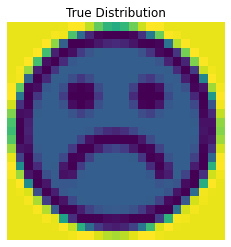

In [13]:
plot_2d_dist(dist,'True Distribution')

In [7]:
train_data = generate_2d_data(n_train, dist)

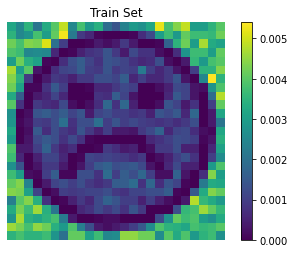

In [14]:
train_dist = np.zeros((d, d))
idxs = train_data.astype('int32')
for i in range(len(train_data)):
  train_dist[idxs[i][0], idxs[i][1]] += 1
train_dist /= train_dist.sum()
plt.figure()
plt.title('Train Set')
plt.imshow(train_dist)
plt.axis('off')
plt.xlabel('x1')
plt.ylabel('x0')
plt.colorbar()
plt.show()

In [8]:
ds = tf.data.Dataset.from_tensor_slices(train_data)
ds = ds.shuffle(1000).batch(128, drop_remainder=True)

In [9]:
class SimpleAutoregModel(tf.keras.layers.Layer):
  def __init__(self, d):
    super(SimpleAutoregModel, self).__init__()
    self.d = d
    self.logits_x0 = self.add_weight(shape=(d,), initializer="zeros", trainable=True)
    self.cond_x1 = tf.keras.models.Sequential([
            tf.keras.layers.Dense(50, input_shape=(d,), activation='relu'),
            tf.keras.layers.Dense(50, activation='relu'),
            tf.keras.layers.Dense(d)
    ])
    self.cond_x1.trainable = True

  def call(self, x):
    x0, x1 = x[:, 0], x[:, 1]
    batch_size = x.shape[0]
    l = tf.expand_dims(self.logits_x0, axis=0)
    logits_x0 = tf.tile(l,(batch_size,1))
    loss_x0 = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
          logits=logits_x0, labels=tf.cast(x0, dtype=tf.dtypes.int32)
      ))
    x0_onehot = tf.one_hot(tf.cast(x0, dtype=tf.dtypes.int32), self.d)
    logits_x1 = self.cond_x1(x0_onehot)
    loss_x1 = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
          logits=logits_x1, labels=tf.cast(x1, dtype=tf.dtypes.int32)
      ))
    return loss_x0 + loss_x1

  def get_dist(self):

    x0 = tf.range(0,limit=self.d, dtype=tf.dtypes.int64)
    x0 = tf.one_hot(x0, self.d)

    prob_x0 = tf.expand_dims(tf.nn.softmax(self.logits_x0, axis=0), axis=1)
    
    prob_x1 = tf.nn.softmax(self.cond_x1(x0), axis=1)

    prob = prob_x0 * prob_x1
    return prob.numpy()


In [10]:
def train(model, dataset, optimizer):
  model.trainable = True
  for x in dataset:
    with tf.GradientTape() as tape:
      loss = model(x)
      grads = tape.gradient(loss, model.trainable_weights)

      optimizer.apply_gradients(zip(grads, model.trainable_weights))

In [11]:
sa = SimpleAutoregModel(d)

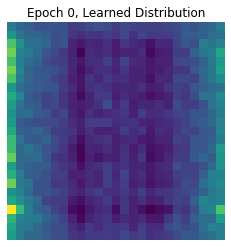

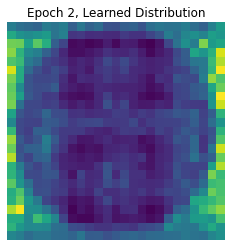

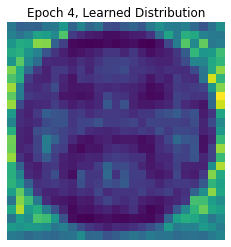

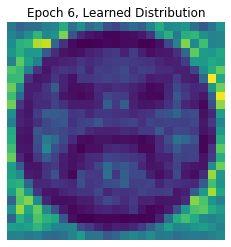

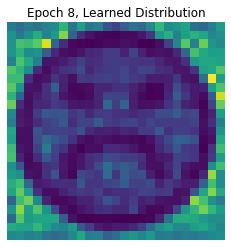

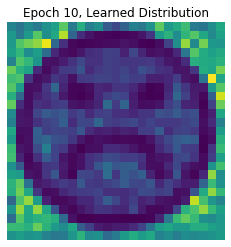

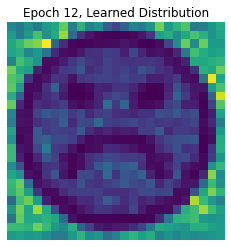

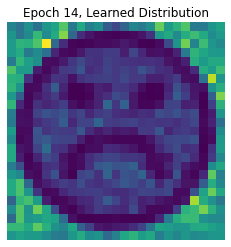

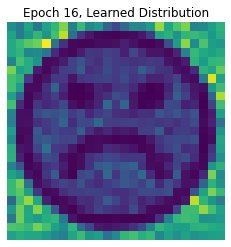

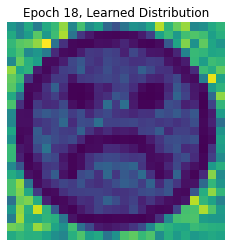

In [12]:
epochs=20
lr=1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
for epoch in range(epochs):
  train(sa, ds, optimizer)
  if epoch % 2 == 0:
    plot_2d_dist(sa.get_dist(), title=f'Epoch {epoch}, Learned Distribution')